# Detecting Depression through NLP and DL

1. Evelyn Peh Ting Yu
2. Koh Pei Ling
3. Lau Wei Ting
4. Song Yu Xiang
5. Jian Yi
6. Luqman Juzaili

## 1. Import Libraries

In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
stop=nltk.corpus.stopwords.words('english')

from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer

from wordcloud import WordCloud


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from collections import defaultdict

from sklearn.metrics import classification_report

In [45]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)
pd.get_option('max_colwidth')
pd.set_option('max_colwidth', 500)

## 2. Import Datasets

In [46]:
df2 = pd.read_csv("Mental-Health-Twitter.csv")  #emoji datatset
df1 = pd.read_csv("sentiment_tweets3.csv")

In [47]:
df1.head()

Index                                                                                                                       message to examine  label (depression result)
0    106                                                                                just had a real good moment. i missssssssss him so much,                           0
1    217                                                                                               is reading manga  http://plurk.com/p/mzp1e                          0
2    220                                                     @comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8                           0
3    288  @lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.                           0
4    540                                                                                            ADD ME ON MYSPACE!!!  myspace.com/LookThunder                          0

In [48]:
df1.rename(columns={'message to examine':"Message"},inplace=True)
df1.rename(columns={'label (depression result)':"Label"},inplace=True)

In [49]:
df1.columns

Index(['Index', 'Message', 'Label'], dtype='object')

In [50]:
df1.drop(["Index"],inplace=True,axis=1)

In [51]:
df1.head(100)
# df1.sample(10)

Message  Label
0                                                                                                                just had a real good moment. i missssssssss him so much,       0
1                                                                                                                               is reading manga  http://plurk.com/p/mzp1e      0
2                                                                                     @comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8       0
3                                  @lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.       0
4                                                                                                                            ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0
5                                                                                                                                    so sleepy. good times tonight though       0
6                                                            @SilkCharm re: #nbn as someone already said, does fiber to the home mean we will all at least be regular now       0
7                                                                                                                                       23 or 24ï¿½C possible today. Nice       0
8                                                                                                                              nite twitterville  workout in the am  -ciao      0
9                                                                                                                          @daNanner Night, darlin'!  Sweet dreams to you       0
10                                                                                                                                                Good morning everybody!       0
11                                     Finally! I just created my WordPress Blog. There's already a blog up on the Seattle Coffee Community  ... http://tinyurl.com/c5uufd      0
12                                                                                         kisha they cnt get over u til they get out frm under u just remember ur on top       0
13                                                                                          @nicolerichie Yes i remember that band, It was Awesome, Will you please reply       0
14                                                                                                                                  I really love reflections and shadows       0
15                                                                                                  @blueaero ooo it's fantasy?  i like fantasy novels   will check it out      0
16                                           @rokchic28 no probs, I sell nothing other than my blog http://snedwan.com  I'll have to get a listen to your band, on iTunes?      0
17                                                                                                    @shipovalov &quot;NOKLA connecting people&quot; ?? ???????  ???????       0
18                                                                              Once again stayed up to late and have to start too early  It is a good thing I like my job      0
19                                                                                           @Kal_Penn I just read about your new job, CONGRATULATIONS!  That's fantastic.      0
20                                                                                               haven't been able to sleep at ALL. i think i'll watch Ugly Betty online.       0
21                                                            woo thanks ron and steeve for following me yeow i have folowerssss  haha  p.s i wanna got to the ellen show       0
22                                                                   

In [52]:
df2.head(10)

Unnamed: 0             post_id                    post_created                                                                                                                                     post_text     user_id  followers  friends  favourites  statuses  retweets  label
0           0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015  It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.  1013187241         84      211         251       837         0      1
1           1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015                                               It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...  1013187241         84      211         251       837         1      1
2           2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015                                                                              Awake but tired. I need to sleep but my brain has other ideas...  1013187241         84      211         251       837         0      1
3           3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015  RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay http://t.co/…  1013187241         84      211         251       837         2      1
4           4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015         It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety  1013187241         84      211         251       837         1      1
5           5  637692793083817985  Sat Aug 29 18:26:24 +0000 2015                                                                                          Making packing lists is my new hobby... #movinghouse  1013187241         84      211         251       837         1      1
6           6  637691649943072772  Sat Aug 29 18:21:51 +0000 2015                                At what point does keeping stuff for nostalgic reasons cross the line into plain old hoarding...? #movinghouse  1013187241         84      211         251       837         1      1
7           7  637689418472652800  Sat Aug 29 18:12:59 +0000 2015                                                  Currently in the finding-boxes-of-random-shit packing phase. I think I’m a closet hoarder...  1013187241         84      211         251       837         0      1
8           8  637687177946734592  Sat Aug 29 18:04:05 +0000 2015                                                                                     Can't be bothered to cook, take away on the way 😁👍🏼 #lazy  1013187241         84      211         251       837         0      1
9           9  637684866906255360  Sat Aug 29 17:54:54 +0000 2015                 RT @itventsnews: ITV releases promo video for the final series of Downton Abbey http://t.co/mC8Ive72zR http://t.co/CFBKrRvJIs  1013187241         84      211         251       837        41      1

In [53]:
df2.drop(columns=["Unnamed: 0", "post_id", "post_created","user_id",'followers', 'friends', 'favourites', 'statuses', 'retweets'], inplace=True)

In [54]:
df2.rename(columns={"post_text": "Message"}, inplace=True)
df2.rename(columns={"label": "Label"}, inplace=True)

In [55]:
df2.sample(10)

Message  Label
18918                                                                                                                      User:Anthienly https://t.co/8PIJwPDdmg      0
12018                                                                                                                    I wish I had a couple of sleeping pills.      0
15836                                 @FantasticJerk didnt bother to finish the game post chapter 1. Lol the cinematic that you see at the end of Cp1 is actually      0
992                  @BenBuckwalter I love you so much, you're amazing. I hope everything is going perfectly in your life. You have am amazing smile.  Be happy💚💙      1
3538                                                              "@FeelingThePain_: Sometimes I think stop but I know I deserve everything I've done to myself."      1
1473   £98 to go to hit the magic £500! \r\n\r\nhttps://t.co/KTdNYZw1Ki\r\n\r\nhttp://t.co/n0Vur0kB9l \r\n\r\n#autism #Aspergers #autism24 http://t.co/JOvUd2ALC5      1
7996                                                                        RT @HistoryInPics: Christmas in the German trenches, WWI, 1914 http://t.co/xICmL2CyHV      1
4258                                        @PrincessAsh1ey oh wow, you're the oldest trans person I've ever talked to! I wonder what life is like at that age...      1
14215                                         @OKhan24 @KingJames wait if he's your dad that means he looks like you which means he is you. You are your own dad😱      0
15622                                                                                                                                @fumeelee @ZoologiMY it died      0

## 3. Merging Datasets (Without Text Pre-processing)

In [56]:
df_uncleaned = pd.concat([df1,df2])

In [57]:
df_uncleaned.shape

(30314, 2)

## 4. Check and Drop Duplicate

In [58]:
df_uncleaned.duplicated().sum()

543

In [59]:
df_uncleaned.drop_duplicates(inplace=True)

In [60]:
##Checking for null values
df_uncleaned.isnull().sum()

Message    0
Label      0
dtype: int64

In [61]:
df_uncleaned.columns

Index(['Message', 'Label'], dtype='object')

## 5. Exploratory Data Analysis
source: https://www.kaggle.com/code/shahules/basic-eda-cleaning-and-glove

Findings about Target  Variable: 
> imbalance dataset with 59% non-depressive, 41% depressive

In [62]:
df_uncleaned.Label.value_counts(normalize = True)

0    0.590037
1    0.409963
Name: Label, dtype: float64

<AxesSubplot: xlabel='Label', ylabel='count'>

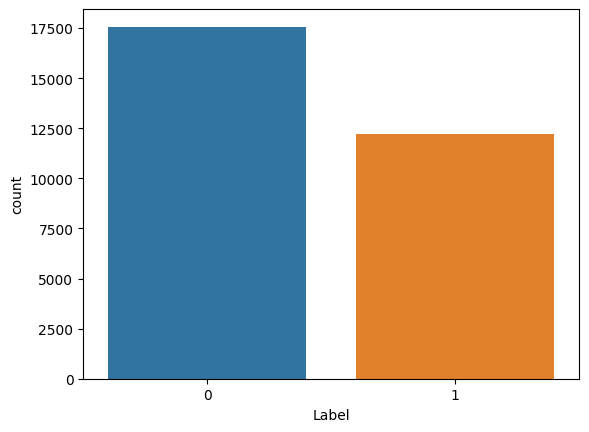

In [63]:
sns.countplot(x=df_uncleaned["Label"])

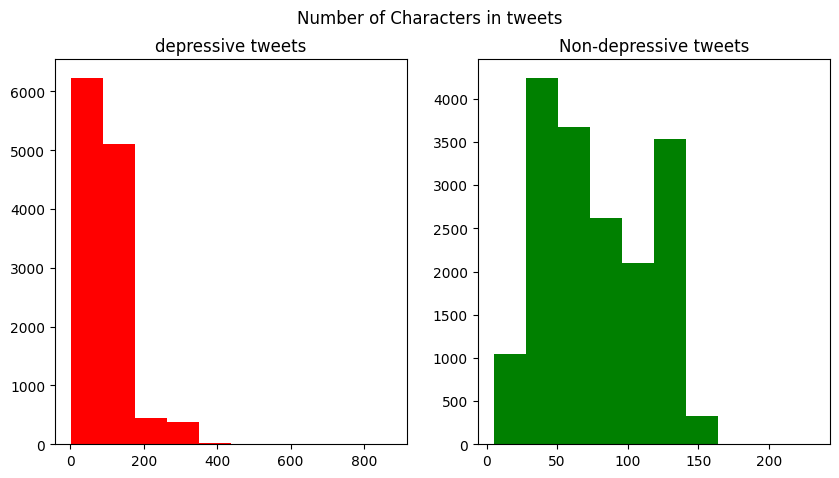

In [64]:
## Number of character

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Number of Characters in tweets')

#depressive
tweet_len=df_uncleaned[df_uncleaned['Label']==1]['Message'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('depressive tweets')

#non-depressive
tweet_len=df_uncleaned[df_uncleaned['Label']==0]['Message'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Non-depressive tweets')

plt.show()

##### Common stopwords in tweets

> In both of classes, "the", "to", "a" dominates 

In [65]:
def create_corpus(target):
    corpus=[]
    
    for x in df_uncleaned[df_uncleaned['Label']==target]['Message'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 10 artists>

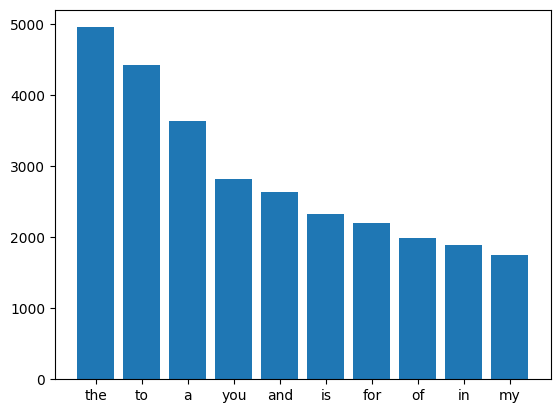

In [66]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

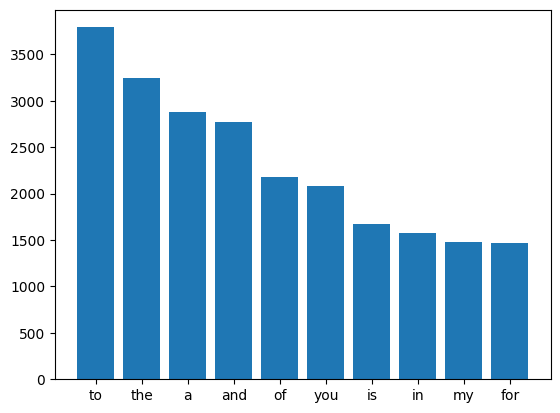

In [67]:
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)
plt.bar(x,y)

##### Number of Stop Words in a sentence on average 


In [68]:
# This will return us the percentage of Stop Words in Each Tweet. 

percentage_of_stop_word_in_each_tweet = []

def percentage_of_stop_word():
    for x in df_uncleaned['Message']:
        stop_word = 0.0
        total_word_per_sentence = 0.0
        for each_word in x.split(" "):
            if each_word in stop:
                stop_word += 1
            total_word_per_sentence += 1
        
        percentage_of_stop_word_in_each_tweet.append(stop_word/total_word_per_sentence)
    

percentage_of_stop_word()


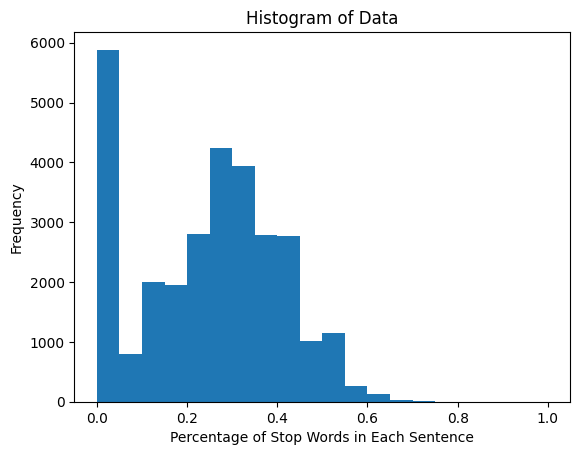

In [69]:
import matplotlib.pyplot as plt

data = percentage_of_stop_word_in_each_tweet

# Create a histogram with 0.05 bin width
bins = list(map(lambda x: x / 20, range(21)))
plt.hist(data, bins=bins)

# Add labels and title
plt.xlabel('Percentage of Stop Words in Each Sentence')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Show the histogram
plt.show()


##### Common punctuation in tweets

<BarContainer object of 25 artists>

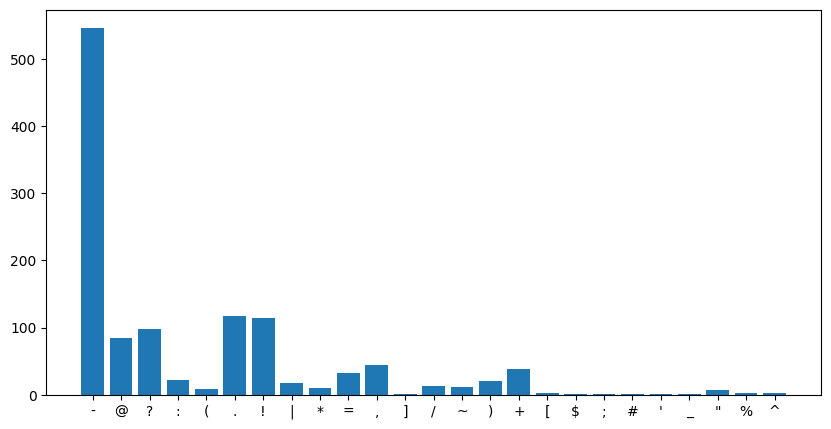

In [70]:
plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 23 artists>

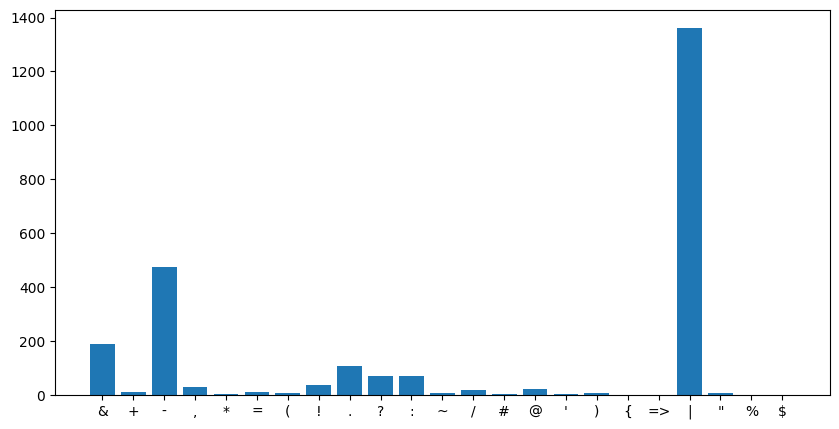

In [71]:
plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

##### Common Words

In [72]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

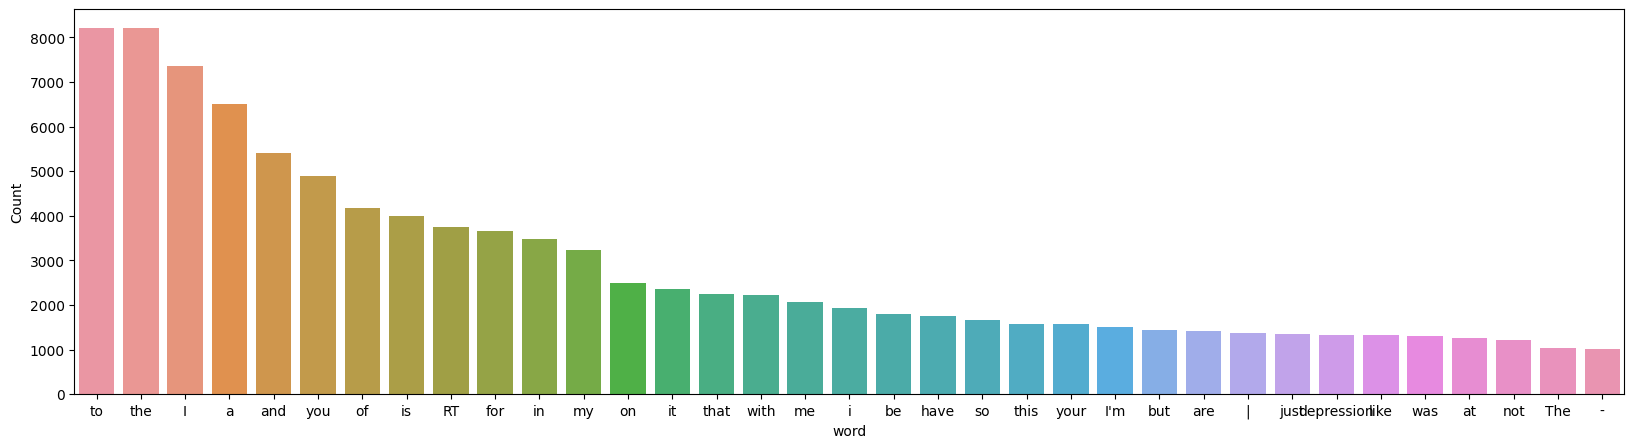

In [73]:
freq_words(df_uncleaned['Message'], 35)

#### Word Cloud

In [74]:
# python -m pip install wordcloud

In [75]:
from PIL import Image

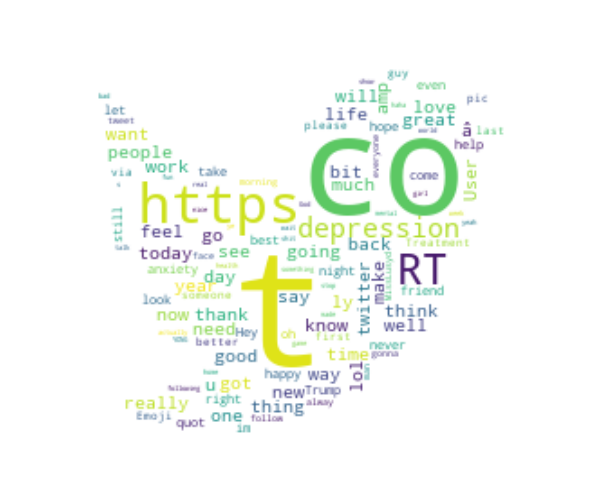

In [76]:
depressive_words = ' '.join(list(df_uncleaned['Message']))
mask = np.array(Image.open("Twitter.png"))
depressive_wc = WordCloud(collocations=False, mask=mask, background_color="white").generate(depressive_words)
plt.figure(figsize = (8, 6))
plt.imshow(depressive_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

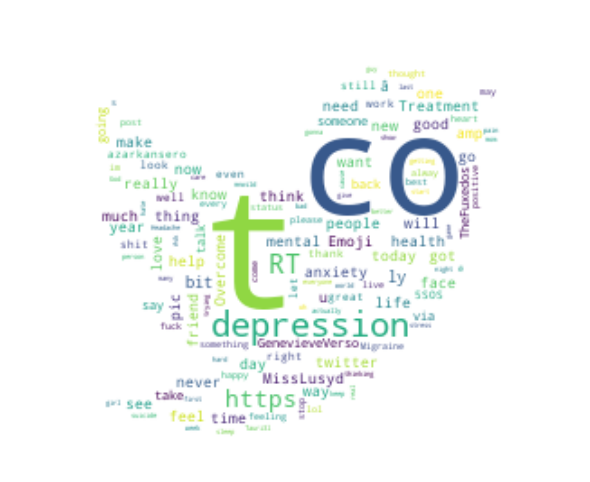

In [77]:
depressive_words = ' '.join(list(df_uncleaned[df_uncleaned['Label'] == 1]['Message']))
mask = np.array(Image.open("Twitter.png"))
depressive_wc = WordCloud(collocations=False, mask=mask, background_color="white").generate(depressive_words)
plt.figure(figsize = (8, 6))
plt.imshow(depressive_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

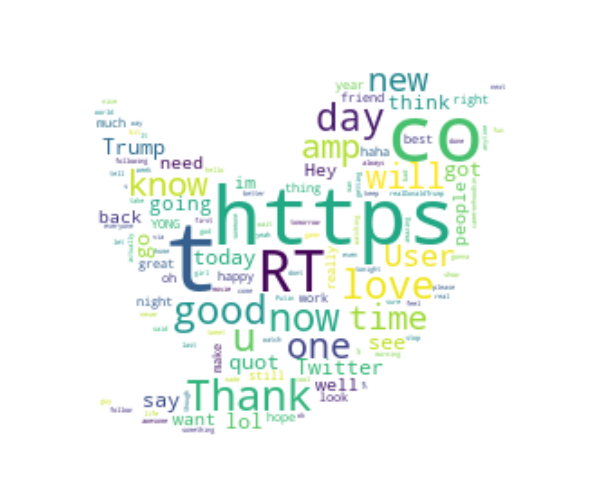

In [78]:
depressive_words = ' '.join(list(df_uncleaned[df_uncleaned['Label'] == 0]['Message']))
mask = np.array(Image.open("Twitter.png"))
depressive_wc = WordCloud(collocations=False, mask=mask, background_color="white").generate(depressive_words)
plt.figure(figsize = (8, 6))
plt.imshow(depressive_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

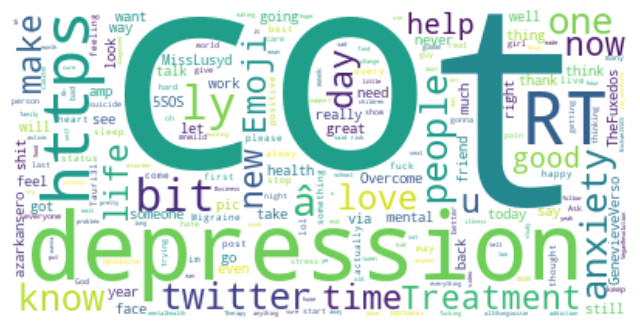

In [79]:
depressive_words = ' '.join(list(df_uncleaned[df_uncleaned['Label'] == 1]['Message']))
# mask = np.array(Image.open("Twitter.png"))
depressive_wc = WordCloud(collocations=False, background_color="white").generate(depressive_words)
plt.figure(figsize = (8, 6))
plt.imshow(depressive_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

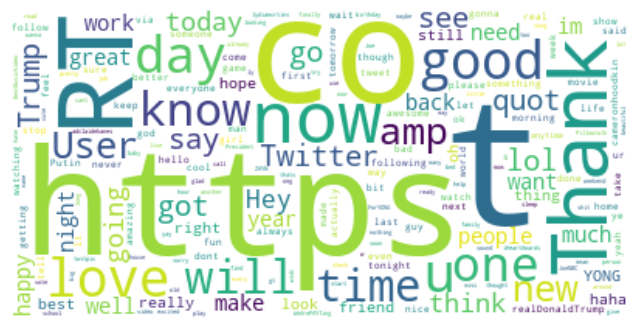

In [80]:
depressive_words = ' '.join(list(df_uncleaned[df_uncleaned['Label'] == 0]['Message']))
# mask = np.array(Image.open("Twitter.png"))
depressive_wc = WordCloud(collocations=False, background_color="white").generate(depressive_words)
plt.figure(figsize = (8, 6))
plt.imshow(depressive_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

##### Ngram Analysis

Bigram (n=2) analysis over the tweets to check the most common bigrams in tweets.

In [81]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot: >

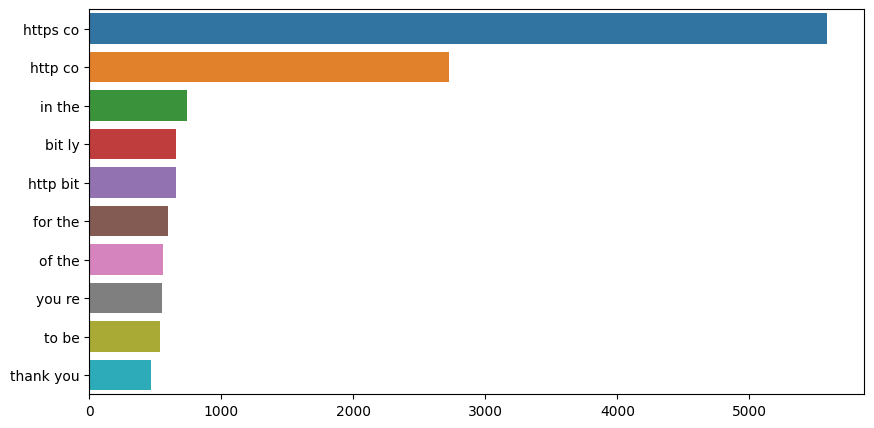

In [82]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(df_uncleaned['Message'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

> Hence the most frequent words are often unimportant words such as https which is an internet protocol and other words that does not echo much meaning for people identified with depression. Therefore, there is a need of thorough data cleaning 


## 5. Data Cleaning for the merged dataset 

https://www.kaggle.com/code/ardawrld/twitter-sentiment-analysis-about-the-depression

In [83]:
df2.shape

(20000, 2)

In [84]:
## Remerge the data after dropping all RT in the 2nd data set -- substr = "RT @" 

df2 = df2[~df2.Message.str.contains("RT @")]
df_uncleaned = pd.concat([df1,df2])

In [85]:
df_uncleaned.shape

(26609, 2)

In [86]:
df2.head(100)

Message  Label
0    It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.      1
1                                                 It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...      1
2                                                                                Awake but tired. I need to sleep but my brain has other ideas...      1
4           It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety      1
5                                                                                            Making packing lists is my new hobby... #movinghouse      1
6                                  At what point does keeping stuff for nostalgic reasons cross the line into plain old hoarding...? #movinghouse      1
7                                                    Currently in the finding-boxes-of-random-shit packing phase. I think I’m a closet hoarder...      1
8                                                                                       Can't be bothered to cook, take away on the way 😁👍🏼 #lazy      1
10                                                                                ... also, I have too much stuff. Way, way too much #movinghouse      1
11                                                   I never want to put one of these together again #lotharderthanitlooks http://t.co/70ujlTCKlB      1
12                                                                      Moving stuff is bloomin’ knackering... and there’s still loads to do... 😥      1
13                                                                             Back at the house, moving stuff. It’s so peaceful here... I ❤️ 🏡 😊      1
14                                                                                      Urgh. Anxiety. FFS where does it come from?! (Breathe...)      1
15                                                                          I have too much stuff. Way, way too much... Massive purge on the way.      1
16                                                    Hideous traffic on the A14. Must remember to pay closer attention to the traffic reports...      1
17                                                                                                            Packing and purging. Feels good 😊👍🏼      1
18                                                                                              In B&amp;Q looking at internal doors. Fun times 😉      1
19                                                                                 Time to get up. So many things to do, such a busy day ahead...      1
20                                                                    It's 6:20... do I get up or lie here a little longer with my cat buddy... ❓      1
21                                                                  There's nothing like cocktails and exhaustion to aid a good night's  sleep...      1
22                                           Great night out with my favourite ladies. Much needed after the past few days. I love them so much 💕      1
23                                                                            Sat down on the sofa for a quick rest... an hour ago. Need to move.      1
24                                                                                                         How much do I want pizza right now...?      1
25                                                             I will always love you.\r\n\r\nPeter Gabriel - In Your Eyes http://t.co/foAexmvoid      1
26                                                    Such a busy day ahead. I need to focus but I'm feeling on the edge of derailment right now.      1
27                                               Even now the smallest thing still makes my heart break. I doesn't feel like that ever goes away.      1
28     

### 5.1 Conversion to all Lower Case 

In [87]:
def text_to_lower(text):
    text = text.lower()
    return text

In [88]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:text_to_lower(x))

In [89]:
df_uncleaned.sample(50)

Message  Label
7164                                                                                                                                                                                                                                                                                              i hate myself      1
10073                                                                                                                                                                                               just one puff of cannabis 'could ease depression, stress and anxiety' - the sun  https://goo.gl/fb/nfr2riâ       1
15679                                                                                                                                                                                                                                   @marijuanx basically its how all millenials talk what chu goin on abkut      0
3351                                                                                                                                                                                                 i bought glasses today for the first time is eight years. the lasik wore off and old age has taken hold!        0
820                                                                                                                                                                                                                                                                   at anfield waiting for the game to start       0
701                                                                                                                                                                                                                             this emotion stuff is so human!    love and accept yourself exactly as you are.      0
5806                                                                                                                                                                                                       watching 'fly with me video premieres june 7th ' on bb good to me  #jtv http://justin.tv/mr_good_guy      0
12221                                                                                                                                                              @kmov @realdonladtrump @morningmika @joenbc @cbsthismorning @cnnpolitics  @morningmika mika keeps saying...no story… https://t.co/dadzvxbvqr      0
9709                                                                                                                                                                                                  thats not how depression and anxiety work, you can't just think about simethibg else and make it go away.      1
9091                                                                                                                                                                                                                                 ask hn: effective methods to fight depression?  https://goo.gl/fb/q2mcpxâ       1
17553                                                                                                                                                                                                 i feel like career progression from here is a para planner role and then client facing financial adviser.      0
6791                                                                                                                                                                                           @dannywood sounds fancy  think that is my cue to get my sluggish self up and head to the gym! thanks danny love!      0
18527                                                                                                                                                                                                                                                        

### 5.2 Removal of HTML entities 

In [90]:
# These are the HTML Entities 
html_entities = {'&nbsp;': '', '&iexcl;': '', '&cent;': '', '&pound;': '', '&curren;': '', '&yen;': '', '&brvbar;': '', 
                  '&sect;': '', '&uml;': '', '&copy;': '', '&reg;': '', '&trade;': '', '&macr;': '', '&deg;': '', 
                  '&plusmn;': '', '&sup2;': '', '&sup3;': '', '&acute;': '', '&micro;': '', '&para;': '', '&middot;': '', 
                  '&cedil;': '', '&sup1;': '', '&ordm;': '', '&raquo;': '', '&frac14;': '', '&frac12;': '', '&frac34;': '', 
                  '&iquest;': '', '&Agrave;': '', '&Aacute;': '', '&Acirc;': '', '&Atilde;': '', '&Auml;': '', 
                  '&Aring;': '', '&AElig;': '', '&Ccedil;': '', '&Egrave;': '', '&Eacute;': '', '&Ecirc;': '', '&Euml;': '', 
                  '&Igrave;': '', '&Iacute;': '', '&Icirc;': '', '&Iuml;': '', '&ETH;': '', '&Ntilde;': '', '&Ograve;': '', 
                  '&Oacute;': '', '&Ocirc;': '', '&Otilde;': '', '&Ouml;': '', '&times;': '', '&Oslash;': '', 
                  '&Ugrave;': '', '&Uacute;': '', '&Ucirc;': '', '&Uuml;': '', '&Yacute;': '', '&THORN;': '', '&szlig;': '', 
                  '&agrave;': '', '&aacute;': '', '&acirc;': '', '&atilde;': '', '&auml;': '', '&aring;': '', '&aelig;': '', 
                  '&ccedil;': '', '&egrave;': '', '&eacute;': '', '&ecirc;': '', '&euml;': '', '&igrave;': '', '&iacute;': '', 
                  '&icirc;': '', '&iuml;': '', '&eth;': '', '&ntilde;': '', '&ograve;': '', '&oacute;': '', '&ocirc;': '', 
                  '&otilde;': '', '&ouml;': '', '&divide;': '','&amp;': '', '&lt;': '', '&gt;': '', '&quot;': '', '&apos;': ''}

In [91]:
html_re = re.compile('(%s)' % '|'.join(html_entities.keys()))

def replace_html_entities(text,contractions_dict=html_entities):
  def replace(match):
    return html_entities[match.group(0)]
  return html_re.sub(replace, text)

df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:replace_html_entities(x))


In [92]:
df_uncleaned.sample(100)

Message  Label
9184                                                                                                                                                                                                      for now ima keep fuckin cuz i love this shit      1
9145                                                                                                     thankful for the people in my life helping me get through this depression. i don't know what i would do without this kind of love and support      1
18112                                                                                                                                                                                                             the lash ceo https://t.co/huz1isxydl      0
6245                                                                                                                                      @pranaydewan yes. first!!! but definitely not the last. it was the creme variant not the plain original one       0
14695                                                                                                                                                                                 keep mady honest bc she won't believe me https://t.co/mtxrmwszb0      0
13073                                                                                                     @newmediarules @morning_joe you've only fooled yourselves and those that liked to be fooled!!you know, those that v… https://t.co/edtuizosvk      0
10374                                                                                                                            @lydiamcrtins ig just let me know if u got any thoughts or questions about it,,, we're still on for tuesday tho right      0
5794                                                                                                                                                                                            my church...gets fucked up on communion wine!--watsky       0
19042                                                                                                                                                                                                      guide servicealaska https://t.co/syvgn4za6d      0
9988                                                                                                                                       who couldnt afford the bus, got ripped off, got into a car accident, suffering from depression and anxiety,      1
1848                                                                                                                                                                                  omg, that is soo so cute  http://www.heatworld.com/article/10530      0
3524                                                                                                                                                             another lovely day here in essex, looking forward to being in the sun for most of it       0
8070                                                                                                                                                                           3 people followed me // automatically checked by http://t.co/bqz8j61zyj      1
16647                                                                                                                                               if you're a guy, would you perm your own hair? kerintingkan rambut lurus. from boring, asian hair.      0
15688                                                                                                               then kindergarten when he was 5. his parents were called by the school because during playtime, the other kids were playing around      0
15682                                                                                                                                                                 @madreeve

### 5.3 Removal of Hashtags

In [93]:
# Removal of HashTag
def remove_hashtags (text):
    text = re.sub(r"#\w+", '', text, flags=re.MULTILINE)
    return(text)


In [94]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:remove_hashtags(x))

In [95]:
df_uncleaned.sample(100)

Message  Label
19173                                                                                                                                                                                                                                                                    bikes barcelona rental https://t.co/y5csarjy0y      0
2309                                                                                                                                                                                                                                                                  my bis connection is kaput, no bbm, feels lonely       0
1698                                                                                                                                                                                                                                                             mmmm smells like homemade enchiladas and mexican rice       0
2024                                                                                                                                                                         vote 1 socialist equality party support the socialist alternative to war … – world socialist web site | depression… http://t.co/obyuhjlhqz      1
18370                                                                                                                                                                                                                                                                            garth ormesher https://t.co/7iqhzxyneb      0
7457                                                                                                                                                                                                                                               they let me have the dinosaur sippy cup!!!!! https://t.co/ynjtw8uhe3      1
14892                                                                                                                                                                               oh ye. kawan aku jual pedang samurai dari harga 2000-100 000. if anyone's interested, you can dm me and i'll get in touch with him.      0
4044                                                                                                                                                                             @znatrainer all i had planned was to work in my yard and enjoy the sun,  which i did!   did you have anything planned for the weekend?      0
14147                                                                                                                                                                                 happy new years everybody🎉🎉🎉🎉 may this year be better than the last cuz it's really hard for it to be much worse !!! 2️⃣0️⃣1️⃣7️⃣      0
8981                                                                                                                                                                                                                                      @azarkansero also it's possible the ss met prewar nick since she was a lawyer      1
1365                                                                                                                                                                                                                                                                        @gooderz09 i think ill be doin the same m8       0
7917                                                                                                                                                                                                                                                                             syllabus week to hell week real quick.      1
8607                                                                                      @senexchange  as above, majority of mental health i deal with relat

### 5.4 Conversion of contractions

In [96]:
# Converting it to string type
df_uncleaned['Message'] = df_uncleaned['Message'].astype("str")
df_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26609 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Message  26609 non-null  object
 1   Label    26609 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 623.6+ KB


In [97]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "i'd": "i would", "i'd've": "i would have","i'll": "i will",
                     "i'll've": "i will have","i'm": "i am","i've": "i have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have",
                    
                    "aint": "are not","'s":" is","arent": "are not",
                     "cant": "cannot","cantve": "cannot have",
                     "'cause": "because","couldve": "could have","couldnt": "could not",
                     "couldntve": "could not have", "didnt": "did not","doesnt": "does not",
                     "dont": "do not","hadnt": "had not","hadnt've": "had not have",
                     "hasnt": "has not","havent": "have not","hed": "he would",
                     "hedve": "he would have","hell": "he will", "hellve": "he will have",
                     "howd": "how did","howdy": "how do you","howll": "how will",
                     "id": "i would", "id've": "i would have","ill": "i will",
                     "illve": "i will have","im": "i am","ive": "i have", "isnt": "is not",
                     "itd": "it would","itd've": "it would have","itll": "it will",
                     "itll've": "it will have", "lets": "let us","maam": "madam",
                     "maynt": "may not","mightve": "might have","mightnt": "might not", 
                     "mightntve": "might not have","mustve": "must have","mustnt": "must not",
                     "mustn'tve": "must not have", "neednt": "need not",
                     "needn'tve": "need not have","oclock": "of the clock","oughtnt": "ought not",
                     "oughtntve": "ought not have","shant": "shall not","shant": "shall not",
                     "shantve": "shall not have","shed": "she would","shedve": "she would have",
                     "shell": "she will", "shellve": "she will have","shouldve": "should have",
                     "shouldnt": "should not", "shouldntve": "should not have","sove": "so have",
                     "thatd": "that would","thatdve": "that would have", "thered": "there would",
                     "theredve": "there would have", "theyd": "they would",
                     "theydve": "they would have","theyll": "they will",
                     "theyllve": "they will have", "theyre": "they are","theyve": "they have",
                     "tove": "to have","wasnt": "was not","wed": "we would",
                     "wedve": "we would have","well": "we will","well've": "we will have",
                     "were": "we are","weve": "we have", "werent": "were not","whatll": "what will",
                     "whatllve": "what will have","whatre": "what are", "whatve": "what have",
                     "whenve": "when have","whered": "where did", "whereve": "where have",
                     "wholl": "who will","whollve": "who will have","whove": "who have",
                     "whyve": "why have","willve": "will have","wont": "will not",
                     "wontve": "will not have", "wouldve": "would have","wouldnt": "would not",
                     "wouldntve": "would not have","yall": "you all", "yalld": "you all would",
                     "yalldve": "you all would have","yallre": "you all are",
                     "yallve": "you all have", "youd": "you would","youdve": "you would have",
                     "youll": "you will","youllve": "you will have", "youre": "you are",
                     "youve": "you have"}

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [98]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:expand_contractions(x))

In [99]:
df_uncleaned.sample(50)

Message  Label
3769                                                                                                                                                       as a true patriots fan i hate the ones who have hopped on the bandwagon within the last 5 years. you all are not fans. smh..      1
16062                                                                                                                                                                                                                                     @meetthebatman nooope. sti will not into bdsm      0
4027                                                                                                                                                                                                                                             i guess victory tastes like oily food       0
606                                                                                                                                                                                                                                    emotional  and self harm: http://t.co/wjpn7c8ldc      1
2968                                                                                                                                                                                                                     @exclusi haveday26 good morning!! have a safe and blessed day       0
18923                                                                                                                                                                                                                                                 user:ai01 https://t.co/mxnislruzq      0
70                                                                                                                                                                                           what an awful, awful tragedy. let us hope the casualties are few 😟 https://t.co/fkrqw7xrhp      1
12238                                                                                                                                      @maddow rachel, one last item.... "sins against america"  "sin against america"  or   "do not sin against american"… https://t.co/9uvrrf4q58      0
4718                                                                                                                                          here is a tip: do not compare audience sizereactions and whether one group "got" the show on social media where audience members can see.      1
8033                        @bbcone @hughfw @jamieoli haver @hairgilded whereas shows on tv designed to make you feel guilty about being large regardless of whether you are otherwise happy at the size you are or not...those do wonders to i amprove depression in people, right? ;)      1
17096                                                                                                                                                                                                                                      be mature enough\r\n\r\nyong paytforluckysun      0
10181                                                                                                                                                                                                                                                     honey https://t.co/uogopvoaoa      0
8596   @medscape @ajbrzski @angrierthanmost lol. i would much rather not put any neurotoxins in my body regardless of dose. fact is it is a neurotoxin buddy. - lowers iq - connected to adhd and depression.. i will pass. like i have sai would. you do you, i will do me. good luck.      1
3324                                                                                                                                                                                                                         @erbo08 no tweet deck ela n apare

### 5.5 Removal of URL

In [100]:
def remove_urls (text):
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)
    return(text)

In [101]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:remove_urls(x))

In [102]:
df_uncleaned.sample(50)

Message  Label
16096                                                                                                                                                                                                     @andthebooks_ happy birthday mate. keep on reading books wi will ya.      0
19347                                                                                                                                                                                                                                                     user:duane bergeson       0
16262                                                                                                                                                                                                            @piargh sebab...wait. that is a good question. why ah? hahaha      0
18017                                                                                                                                                                                                                                                                    cruel      0
230                                                                                                                                                                                                                                              the bangles - eternal flame        1
4897                                                                                                                                                                                                                                   @mizfox7 just like that  u di would it!      0
4567                                                                                                                                                                                                                                  @nuen_ @ss_mangos i am never deleting it      1
2758                                                                                                                                                                                                                                                      your bae @mattwwe9        1
18014                                                                                                                                                                                                                                                                     fuck      0
8375   @honestabe72 i have seen people who are here legally upset over those who are not. rightly so, just as all those who passed through ellis island. have we all forgot that? have we forgot the great depression where that americans wi will not do those jobs fails? 2/      1
18304                                                                                                                                                                                                                                                            allfxbrokers       0
7916                                                                                                                                                                                                                                                         @iamquackary same      1
4889                                                                                                                                                                        finally won a game of settlers of catan. also booked restaurant for birthday dinner. life is good       0
4917                                                                                                                                                                                                        @overloadgen @josephdevries nope, i am 99.9% sure i am a unicorn 😊      1
19680                                                                                        

In [103]:
df_uncleaned.shape

(26609, 2)

### 5.6 Removal of Mentions/Retweets User Accounts 
- This does not remove the row itself. 

In [104]:
def remove_mentions_user (text):
    text = re.sub(r"@\w+", '', text, flags=re.MULTILINE)
    return(text)

In [105]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:remove_mentions_user(x))

In [106]:
df_uncleaned.sample(50)

Message  Label
7524                                                                                                                                                                                                                                             wonderful feature. beautiful pictures! congrats       0
11226                                                                                                                                                                                                                                                              wait who is this i do not knwo      0
5188                                                                                                                                                                                                                           hey tweeps please go vote for  only 8 hours left on this  no sleep      0
9608                                                                                                                                                                                               i am sure no one is sai would this to you, but you should do yoga to i amprove your depression      1
4392                                                                                                                                                                                                                                                                     1-10 how gay r u? — 2.5       1
7392                                                                                                                                                                                                        bf is phone autocorrected "boo" to "bro" and i can never let this new pet name die.        1
14                                                                                                                                                                                                                                      urgh. anxiety. ffs where does it come from?! (breathe...)      1
10225                                                                                                                                                                                                                         ugh sorry for being gross on main. depression depression depression      1
15659                                                                                                                                                                                                                                                              not me, that is for sure. haha      0
9241                                                                                                                                                                   can i go to your school? what are the requirements other than peer pressure and anxiety followe would by depression?   â¦      1
3994                                                                                                                                                                                                  wow, fell in love with sly cooper and ratchet. we will, i know what i am buying on ps3 now       0
11241                                                                                                                                                               i was gonna say that i will watch something happy to distract myself from awtr but . i watch literally 0 lighthearted shows .      0
1184                                                                                                                                                                                                                       somehow i cannot reply to your message lol and yes i know  thank youuu      0
8131                                                                                                                        

### 5.7 Removal of Punctuation

In [107]:
def remove_punctuations (text):
    text = re.sub(r"""[!"¦#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~،؟…«“\":\"…”]""", '', text, flags=re.MULTILINE)
    return(text)

df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:remove_punctuations(x))

In [108]:
df_uncleaned.sample(100)


Message  Label
5136                                                                                                                                                                                                                                   i knew you would miss me 😎      1
18079                                                                                                                                                             sondra barrera is now following me on twitter thank you sondra barrera say he willo anyti ame        0
10561                                                                                                                                                                                                                                             this is so cute      0
18835                                                                                                                                                                                                                                         property and spain       0
9944                                                                                                                                                                                                                              depression does not have a face      1
158                                                                                                                                                                                                                     awake mind racing need to sleep dammit 😟       1
19375                                                                                                                                                                                                                            the institute of digital design       0
7061                                                                                                                                                                                                                                 bulging disc question help        1
16334                                                                                                                                                                when i am older i will be silent besi woulde you\r\ni know words will not be enough\r\n\r\n😚      0
5649                                                                                                                                                                                                                                    i am definitely with it        0
5268                                                                                                                                                                                                                  amontheroof i am out and about today  sowwy      0
4785                                                                                                                                                                                                                              200gb into a new 1tb dri have        0
5342                                                                                                                                                               oooooo  10  starts tomorrow its so wrong but i am looking forward to it  another summer of bb       0
5951                                                                                                                                                                                                                                         i love this so much       1
3236                                                                                                                                                                                                                       y u so cute happy birthday though 😍😊❤️      1
46        

### 5.8 Removal of numbers

In [109]:
df_uncleaned['Message'] = df_uncleaned['Message'].str.replace('\d+', '')

/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_2215/826882887.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_uncleaned['Message'] = df_uncleaned['Message'].str.replace('\d+', '')


In [110]:
df_uncleaned.sample(100)

Message  Label
11881                                                                                                                                                                                                                                           that is the reason i follow your twitter account      0
9040                                                                                                                                 i told cwb this in the worst of her depression there is something so amazing about her joy and love for other authors and artists i never want it to change      1
1951                                                                                                                                                                                                           i am in a new outfit todayd cute blue shirt white shorts with leggings for dance       0
3972                                                                                                                                                                                                                                                                    hmmm let me guesswhales       0
6659                                                                                                                                                                                                                                                                                awww thanks       0
12949                                                                                                                                                                                            leaked snowden document hints at how feds can be so certain russia hacked the us election  via       0
293                                                                                                                                                                                                                                                       lunch over dishwashing over i am back       0
2268                                                                                                                                                                                                                                                                                  follow me       0
12288                                                                                                                                                                                                        lying ted america needs sessions sessions owns a career of sin against america  ag       0
8512                                                                                                                                                                                                                                              oh god are we in sync depression wise too   â      1
2261                                                                                                                                                                                       overcome depression kuwtk khloe kardashian calls husband lamar odom a very depressed   radar online        1
16263                                                                                                                                                                                                             amori    aku ada je si ampan selfies ane but mostly for blackmail purposes lah      0
19293                                                                                                                                                                                                                                                                     wi william stanton md       0
12626                                                                                                                                    

### 5.9 Emojis to textual description conversion

Translate emojis to their textual description. This is to ensure that the sentiment value that an emoji contain will also be considered by the model in future parts.
- Utilise TweetTokenizer to split tweets on a list of words, while treating the emoji as a word itself.
- Utilise Emoji demojize to convert the graphical representation of the emoji to its textual representation which seperated by underscore when the description is more than 1 word e.g., smiling_beaming_face, tears_of_joy

**CHOOSE ONE**
- Retained the text description as it is to differentiate that this phrase is conveyed as an emoji
- Combined the textual description of emojis e.g., "smiling_beaming_face" as "smilingbeamingface" so as to remove special characters that may cause complication in the model in future parts
- Seperate the textual description of emojis e.g, "smiling_beaming_face" as ['smiling','beaming','face'] to consider it as normal words

In [111]:
# pip install emoji-unicode
# pip install emoji --upgrade
# pip uninstall emoji
# pip install emoji==1.7

In [112]:
import emoji
from nltk.tokenize.casual import TweetTokenizer


#### Need to choose one method (How do we store emoji textual description)

In [113]:
## Start of Tweet Tokenizer

## Use Cases to think about
## smiling_cat_face_with_heart-eyes

from emoji import UNICODE_EMOJI

# helper function for convert_emojis; return true if token is an emoji
def is_emoji(s):
    return s in UNICODE_EMOJI

# Break up sentences into list of words while considering emojis
def store_emojis(text):
    
    # break up tweets into words while considering emojis as itself e.g., ['this','is','cool','😁','👍']
    tweet_list = TweetTokenizer().tokenize(text)
    tweet_string = convert_emojis(tweet_list)
    return tweet_string

# Convert emojis into text form
# Method 1: Underscore format - (Retain the actual representation as it is)
# def convert_emojis(text):
#     new_text = []
    
#     for i in range(len(text)):
#         if is_emoji(text[i]):
#             temp = emoji.demojize(text[i], delimiters=("",""))
#             new_text.append(temp)
#         else:
#             new_text.append(text[i])
    
    
#     return ' '.join([str(item) for item in new_text])

# Method 2: Combine together e.g., "red_face" becomes "redface"
# def convert_emojis(text):
#     new_text = []
    
#     for i in range(len(text)):
#         if is_emoji(text[i]):
#             temp = emoji.demojize(text[i], delimiters=("",""))
            
#             if "_" in temp:
#                 temp = temp.split("_")
#                 temp = "".join(temp)

#             new_text.append(temp)
#         else:
#             new_text.append(text[i])
        
#     return ' '.join([str(item) for item in new_text])

# Method 3: Seperate them as normal words e.g., "red_face" becomes ['red','face']
def convert_emojis(text):
    new_text = []
    
    for i in range(len(text)):
        if is_emoji(text[i]):
            temp = emoji.demojize(text[i], delimiters=("",""))
            
            if "_" in temp:
                temp = temp.split("_")
            
            for item in temp:
                new_text.append(item)
        else:
            new_text.append(text[i])
        
    return ' '.join([str(item) for item in new_text])



    

In [114]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:store_emojis(x))

In [115]:
df_uncleaned.sample(100)

Message  Label
9558                                                                                                                                                                                                          depression is not necessarily pathological i t often foreshadows a renewal of the personality or a burst of creati have activity there are moments in human life when a new page is turned      1
509                                                                                                                                                                                                                                                                                                                                                                youth mental health an election issue      1
15571                                                                                                                                                                                                                                                                                    aiyo makcik this is a multiracial multireligious whatsapp group stop spewing your islamic quotes here la sheesh      0
3526                                                                                                                                                                                                                                                                                                                                                                             left funny li amitation      0
18579                                                                                                                                                                                                                                                                                                                                                              usercultivatedconveniencehomeorganizi      0
7092                                                                                                                                                                                                                                                                   had so much fun with the family this weekend really had no ti ame to tweet wi will do better in the morning as for now good night      0
6879                                                                                                                                                                                                                                                                                                                                                             headaches a sign of high blood pressure      1
19230                                                                                                                                                                                                                                                                                                                                                                          shenzhen kyd light co ltd      0
2563                                                                                                                                                                                                                                                                                                 friends of yrold jose cruz who was ki willed by an offduty police officer gathering at bachman lake      1
967                                                                                                                                                                                                                                                                                                                                       yess i know omg i cannot wait ti will you come back i l

### 5.10 Removal of StopWords 


In [116]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

print(stopWords)


{"you're", 'below', 'hers', 'herself', 'them', 'doing', 'been', "couldn't", 'haven', 'few', 'ain', 'those', 'theirs', "hasn't", 'off', 'how', 'only', 'have', 'we', "she's", 'this', 'me', 'in', 'where', 'weren', 'about', 'a', 'down', 'mustn', "don't", 'shan', "doesn't", "won't", "aren't", 'its', 'yours', 'once', 'when', 've', 'with', "weren't", 'having', 'or', 'for', 'don', 'any', 'm', 'does', "wasn't", 'had', "that'll", 'there', 'out', 'between', 'more', 'very', 'again', 'as', 'needn', 'hasn', "needn't", 'so', 'now', 'of', "hadn't", 'isn', "mightn't", 'same', "it's", 'itself', 'further', 'before', 'wouldn', 'i', 'above', 'all', 'ourselves', 'against', 'if', 'each', 're', 'that', 'over', 'will', "shouldn't", 'him', 'he', 'these', 'mightn', 'their', 'couldn', 'by', 'to', 't', 'do', 'my', 'she', "wouldn't", 'up', 'other', 'because', 'here', 'why', 'too', 'ours', 'yourselves', 'were', "should've", 'didn', "you've", 'who', 'some', 'd', "shan't", 'is', "haven't", 's', 'on', 'wasn', 'during',

In [117]:
from string import printable
st = set(printable)
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x: ''.join([" " if  i not in  st else i for i in x]))

In [118]:
import nltk 
def remove_stopwords(paragraph):
  words = nltk.word_tokenize(paragraph)
  wordlist_wo_stopwords=[]
  for w in words:
    if w not in stopWords:
        wordlist_wo_stopwords.append(w)
  print(wordlist_wo_stopwords)

  return wordlist_wo_stopwords

# data1['Message'].replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df_uncleaned['Message'] = df_uncleaned['Message'].astype(str)
df_uncleaned['Message'] = df_uncleaned['Message'].str.replace('[^a-zA-Z0-9]', ' ', regex=True).str.strip()
df_uncleaned['Message'] = df_uncleaned['Message'].apply(remove_stopwords)

['real', 'good', 'moment', 'missssssssss', 'hi', 'much']
['reading', 'manga']
[]
['need', 'send', 'em', 'accountant', 'tomorrow', 'oddly', 'even', 'referring', 'taxes', 'supporting', 'evi', 'wouldence', 'though']
['add', 'myspace', 'myspacecomlookthunder']
['sleepy', 'good', 'ti', 'ames', 'tonight', 'though']
['someone', 'already', 'sai', 'would', 'fiber', 'home', 'mean', 'wi', 'least', 'regular']
['c', 'possible', 'today', 'nice']
['nite', 'twittervi', 'wille', 'workout', 'ciao']
['night', 'darlin', 'sweet', 'dreams']
['good', 'morning', 'everybody']
['finally', 'created', 'wordpress', 'blog', 'already', 'blog', 'seattle', 'coffee', 'community']
['kisha', 'cnt', 'get', 'u', 'til', 'get', 'frm', 'u', 'remember', 'ur', 'top']
['yes', 'remember', 'band', 'awesome', 'wi', 'please', 'reply']
['really', 'love', 'reflections', 'shadows']
['ooo', 'fantasy', 'like', 'fantasy', 'novels', 'wi', 'check']
['probs', 'sell', 'nothing', 'blog', 'get', 'listen', 'band', 'itunes']
['nokla', 'connecting

['arnt', 'laughinggg']
['let', 'office', 'wars', 'begin']
['sitting', 'net', 'cafe', 'boreddddd', 'wait', 'internet', 'new', 'home', 'gets', 'workingg', 'upload', 'crazy', 'pics', 'x']
['watching', 'daily', 'show']
['generous', 'giving', 'fri', 'woulday', 'love']
['already', 'eh', 'thanks', 'always', 'nice', 'funny', 'new', 'avatar', 'pic', 'way', 'lol']
['welcome', 'aboard', 'thanks', 'new', 'follow', 'finallybeen', 'watching', 'u', 'like', 'month', 'haha']
['willas', 'real', 'one', 'better', 'like', 'peacefull', 'people']
['hope', 'everyone', 'fabulous', 'fri', 'woulday', 'happy', 'safe', 'holi', 'woulday', 'weekend', 'xoxo', 'summer']
['el', 'shar', 'yjech', 'feel', 'better', 'theis', 'morning', 'stell', 'feel', 'deazy', 'nothing', 'compared', 'tommy', 'pain']
['first', 'follow', 'fri', 'woulday', 'thanks', 'dude']
['heeeeeey', 'man', 'ruin', 'life', 'via', 'pop', 'quizzes']
['goodmorning', 'skiping', 'st', 'periods', 'sti', 'bed', 'goin', 'class', 'today']
['staying', 'long', 'stan

['bear', 'coming', 'back', 'soon']
['forgot', 'gi', 'hug', 'left', 'yesterday', 'feeling', 'bad']
['yeah', 'love', 'song', 'tho', 'sure', 'wi', 'like', 'movie', 'yeh', 'jonas', 'soon', 'dnt', 'hav', 'foxtel', 'watch', 'youtube']
['thought', 'u', 'might', 'wan', 'na', 'kno', 'born', 'prishtinakosova', 'raised', 'italy', 'moved', 'usa', 'good', 'yrs', 'ago']
['enjoying', 'nice', 'glass', 'red']
['guess', 'wi', 'pretty', 'cool', 'music', 'brazilian', 'flavor', 'mixed', 'hip', 'hop', 'musici', 'like', 'wouldea']
['love', 'andy', 'back', 'used', 'watching', 'back', 'day', 'remember', 'stare']
['yay', 'english', 'exam']
['thanks', 'bit', 'scared', 'dreamhost', 'overall', 'fine', 'want', 'overall', 'heading', 'fun']
['di', 'would', 'mention', 'drinking', 'beer']
['thing', 'think', 'lovely', 'get', 'compli', 'aments']
['swear', 'perfectly', 'normal', 'ti', 'met', 'losers', 'call', 'best', 'mates']
['wouldcarsonvan', 'pls', 'check', 'single', 'note', 'god', 'itunesamazon', 'play', 'ki', 'would'

['completely', 'choked']
['ah', 'blink', 'october', 'nd', 'sweeet']
['finishe', 'would', 'first', 'mi', 'race', 'min', 'milenew', 'record', 'also', 'came', 'second', 'age', 'group', 'th', 'place', 'overall', 'ish']
['lovely', 'morning', 'xmen', 'earring', 'making', 'marathon', 'fun', 'fun', 'fun']
['bored', 'need', 'something', 'know']
['going', 'see']
['oh', 'gosh', 'love', 'boybands', 'jason', 'myspace', 'got', 'aj', 'chris', 'todd', 'course']
['september', 'love', 'change', 'things', 'preparedflavourz', 'cominghahaha']
['used', 'yet', 'come', 'home', 'sponsor', 'wifi']
['way', 'kroger', 'pool', 'waiting', 'tea', 'mcdon']
['willking', 'di', 'would', 'u', 'become', 'awesome', 'lol']
['eaten', 'sooo', 'much', 'tacos', 'omg', 'standmy', 'tummy', 'going', 'ki', 'hahaguess', 'blame']
['sushiti', 'ame', 'go', 'wrong']
['welcome', 'borg']
['listening', 'nas', 'america', 'remember', 'liked', 'hi', 'much']
['wait', 'get', 'si', 'ams', 'kenny', 'buying', 'birthday', 'days']
['want', 'lunch', '

['ki', 'willing', 'gradually', 'save', 'urself', 'see', 'ahead', 'darkness', 'present', 'new', 'sunshine', 'future', 'follow', 'writings', 'via', 'pictwittercomazftse']
['check', 'fun', 'podcast', 'nothing', 'sexier', 'great', 'depression']
['used', 'really', 'bad', 'relationship', 'eating', 'cuz', 'would', 'depressed', 'get', 'esp', 'last', 'relationship', 'lost', 'lot', 'weight', 'became', 'really', 'weak', 'mad', 'eating', 'meals', 'day', 'fix', 'depression', 'lol', 'wtf']
['spending', 'day', 'using', 'create', 'media', 'production', 'show', 'knowledge', 'great', 'depression']
['anxiety', 'depression', 'tried', 'take', 'everything', 'beat', 'refuse', 'let', 'happiness', 'taken', 'away', 'like']
['reason', 'mia', 'mouth', 'going', 'lot', 'things', 'basically', 'short', 'depression', 'state', 'mind', 'mai', 'would', 'even', 'worst', 'nobody', 'never', 'check']
['di', 'would', 'know', 'people', 'england', 'wi', 'experience', 'depression', 'lifeti', 'ame']
['di', 'would', 'know', 'peopl

['seniors', 'cope']
['make', 'sense']
['effect']
['black', 'men', 'mental', 'willness']
['understanding', 'men']
['mentally', 'left', 'behind']
['tackling', 'feelings']
['myths', 'undermine']
['many', 'people', 'know', 'problem']
['pot']
['flood']
['amproves', 'mental', 'health']
['taking', 'care']
['reversing', 'childhood']
['take']
['refusing', 'treatment', 'disorder']
['doctors']
['spotlight', 'prescription']
['daddy', 'home', 'disorder']
['next', 'ti', 'ame', 'notice', 'feeling', 'someone', 'smiles']
['screening', 'physical', 'exams']
['mutations', 'cause', 'half']
['job', 'ampact', 'mental']
['australian', 'mental', 'health', 'system', 'broken']
['scholars', 'question', 'even', 'exists']
['going', 'chiropractor']
['know', 'disorder']
['ki', 'woulds', 'screen', 'electronics']
['increase', 'medication', 'use']
['older', 'women', 'sti', 'enjoy']
['anyone', 'expressed', 'concern', 'much', 'worry']
['love', 'mean']
['talking', 'best']
['ki', 'woulds']
['getting', 'teachers', 'training'

['like', 'mmogames', 'whywhy', 'really', 'like', 'mainly', 'grinding']
['could', 'play', 'vi', 'wouldeo', 'game', 'rest', 'world', 'warcraft', 'vani', 'willa', 'tbc', 'wotlk', 'cata']
['interested', 'show', 'season', 'besi', 'woulde', 'nope']
['goal', 'li', 'happy', 'life']
['pretentious', 'pieces', 'art', 'inherently', 'inferior', 'absolutely']
['season', 'year', 'like', 'spring']
['think', 'nailpare', 'women', 'attracti', 'unattr', 'depends', 'looks', 'good']
['questions', 'retrospring']
['ye', 'sleep', 'ti', 'ame', 'goodnight', 'twit']
['think', 'sleep']
['goodnight', 'sleepy', 'splaz']
['gon', 'na', 'stay', 'phone', 'dies']
['oh', 'advertisements', 'come']
['wouldsanae', 'yes', 'good', 'news', 'makes', 'happy', 'excited']
['glad', 'glad', 'glad', 'glad']
['sti', 'got', 'ta', 'drink', 'something', 'brush', 'teeth', 'wi']
['let', 'everyone', 'happened', 'tomorrow']
['tired', 'happy', 'excited', 'sleep']
['gon', 'na', 'delete', 'happens']
['wwow', 'cosmic', 'gays']
['seems', 'like', '

['photo', 'tamarind', 'crispy', 'fish', 'thai', 'basil', 'glaze', 'tilapia', 'fish', 'fi', 'willets', 'lightly', 'dusted']
['photoset', 'hoe', 'dear', 'white', 'people']
['photo', 'anamorphosisandisolate', 'cruel', 'intentions', 'love', 'love', 'anymore']
['hope', 'know', 'every', 'ti', 'ame', 'tell', 'get', 'home', 'safe', 'stay', 'warm', 'good', 'day', 'sleep']
['nati', 'haveandnai', 'legendxofxzach', 'one', 'ti', 'ame', 'freshmen', 'year', 'college', 'forgot', 'history', 'paper']
['photo', 'bathbug', 'pradafied', 'malaika', 'firth', 'directed', 'sofia', 'coppola', 'marc', 'jacobs', 'daisy', 'ss']
['photoset']
['hope', 'u', 'find', 'someone', 'mindlessly', 'plays', 'hands', 'lightly', 'strokes', 'legs', 'massages']
['photoset']
['photo', 'one', 'secret', 'doors', 'stift', 'admont', 'library', 'austria']
['photo', 'thebaddestfemaleradfem', 'huntyqueen', 'today', 'one', 'friends', 'dress', 'coded', 'bra', 'strap']
['photoset', 'two', 'people', 'love', 'make', 'work', 'real', 'tragedy']

['go', 'anymore', 'stiles', 'malias', 'best', 'scene', 'sti', 'basement', 'scene', 'thank', 'u', 'goodnight', 'reason']
['knwo', 'editing', 'term', 'space', 'part', 'dead']
['amazing']
['wouldekanes', 'also', 'literally', 'never', 'wanted', 'physically', 'fight', 'someone', 'much', 'want', 'fight', 'almost', 'happened', 'tonight']
['popping', 'say', 'got', 'hurl', 'cup', 'water', 'step', 'sister', 'get', 'trouble', 'awesome']
['ti', 'ame', 'work', 'watch', 'trailer']
['wouldekanes', 'spoilers', 'r', 'ight', 'ass', 'gone', 'sapce']
['wi', 'let', 'hi', 'amself', 'saved', 'also', 'saves']
['fuvkgkkg']
['cute']
['shows', 'watch', 'arrow', 'even', 'death', 'disrespect']
['god', 'even', 'properly', 'resurrect', 'laurel', 'keep', 'name', 'legacy', 'ur', 'grubby', 'hands', 'let', 'katie', 'things']
['notthe', 'black', 'canaryomgthis', 'literally', 'hard', 'understand']
['possibly', 'true', 'dc', 'uni', 'haverse', 'origins', 'ki', 'expect', 'somehow', 'fi', 'shoes', 'someone']
['shit', 'hard', 

['maddowalways', 'truth', 'intelligent', 'trust']
['sorry', 'exampletruth', 'gave', 'chance', 'asked', 'failed', 'bigfox', 'vs', 'msnbc', 'need', 'youchris', 'la']
['enough', 'reminded', 'watch', 'foxso', 'obvious', 'greta']
['defended', 'filed', 'cases', 'v', 'actual', 'cases', 'gonzales', 'guest', 'full', 'throat', 'fox', 'type', 'guest', 'full']
['watche', 'would', 'fox', 'record', 'greta', 'tonight', 'msnbc', 'full', 'blown', 'hannityorei', 'willy', 'scriptfox']
['willthink', 'r', 'u', 'sai', 'woulddone', 'racist', 'named', 'mud', 'matt']
['everyone', 'knows', 'evangelicals', 'like', 'hi', 'hatred', 'strong', 'motivator', 'seen', 'close', 'hurts', 'jes']
['know', 'evangelicals', 'like', 'hi', 'seen', 'closehatred', 'many', 'evangelical', 'churches', 'kn']
['sooooooooooooo', 'police', 'unions', 'hold', 'racial', 'views', 'stupi', 'would']
['cnn', 'russia', 'compromising', 'info', 'trump', 'according', 'ic', 'sources']
['donald', 'trump', 'bailed', 'bankruptcy', 'russia', 'cri', 'ame

['want', 'satan', 'come', 'mi', 'willennium', 'smash', 'megi', 'woulddo', 'ark', 'head', 'ki', 'willing', 'instantly']
['fuck', 'f', 'cartoon', 'fake', 'yhvh', 'fuck', 'stupi', 'would', 'sunglasses', 'fuck', 'archangels', 'fuck', 'sunglasses']
['hanged', 'man', 'entered', 'nirvana', 'touche', 'would', 'aleph']
['aleph', 'finishe', 'would', 'enemies', 'walks']
['yeah', 'demifiends', 'cool', 'slays', 'god', 'gets', 'cursed', 'infinite', 'reincarnation']
['fuck', 'daleth']
['want', 'louis', 'step']
['fuck', 'jesus', 'christ']
['aleph', 'furiously', 'danced', 'around']
['hey', 'heh', 'see', 'ordinary', 'ki', 'would']
['oh', 'yes', 'cri', 'aminal', 'record', 'thing', 'willegal', 'done', 'absolutely', 'ki', 'willin', 'dancefloor', 'haha', 'ki', 'wouldding', 'ki', 'willed', 'man']
['enter', 'messian', 'church', 'hp', 'low', 'alignment', 'chaos', 'mara', 'summoned', 'forcibly', 'removed', 'messian', 'church']
['told', 'zayin', 'rebel', 'center', 'actually', 'di', 'would', 'absolute', 'madman',

['freegiftcardcodes']
['userfreegiftcardcodes']
['userlocalseoservice']
['userautoadviceline']
['uservinod', 'sehrawat']
['usergsseattle']
['useramerikansteelscom']
['uservinod', 'sehrawat']
['useramerikansteelscom']
['geminesque', 'following', 'twitter', 'thank', 'geminesque', 'say', 'willo', 'anyti', 'ame', 'amaetoot']
['geminesque', 'following', 'twitter', 'thank', 'geminesque', 'say', 'willo', 'anyti', 'ame', 'amaetoot']
['hey', 'geminesque', 'thanks', 'follow']
['userhelionne']
['useronedoller']
['offplan', 'properties']
['usergreempower']
['rhett', 'power', 'following', 'twitter', 'thank', 'rhett', 'power', 'say', 'willo', 'anyti', 'ame']
['hey', 'rhett', 'power', 'thanks', 'follow']
['rhett', 'power', 'following', 'twitter', 'thank', 'rhett', 'power', 'say', 'willo', 'anyti', 'ame']
['dynamik', 'internet', 'marketing', 'inc']
['king', 'cleaners']
['king', 'cleaners']
['nielson', 'hoover']
['colorado', 'fortcollins', 'comfortinnhotels', 'co']
['nielson', 'hoover']
['useraufaitfin

In [119]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x: ' '.join(x))

In [120]:
df_uncleaned.sample(100)

Message  Label
18753                                                                                                                                          standale si woulding walker      0
12984                                                                                    skunk presi wouldent going stink country loves rat really got problem rat owns hi      0
16103                                                                                                                         want perm hair scared might turn way amagine      0
9702                                                                                                                     says alpha male talking chelsea giving depression      1
1836                                                                                                                  murder accused depressi disorder overcome depression      1
16238                                                                        bri williant wouldea create perfume smells like natural body odour name bau lelaki bau wanita      0
8050   worked inpatient psychiatry certainly noticed bias overdiagnosing schizophrenia underdiagnosing depression bipolar disorder africanamericans relati white americans      1
5660                                                                                                                                                          ti ame early      1
4005                                                                                                   walk dads bedroom get clothes turn look hi literally reading doujin      1
6806                                                                                                                  hurting really lovely seeing last night great ti ame      0
1116                                                                                                                                                 yes ftw lmao watching      0
973                                                                                                                      awesome got busy two weeks uni birthday melbourne      0
1844                                                                                  gi cigarettes cut stress depression new study reveals daily mail overcome depression      1
14816                                                                                                                                                alrighty bwi try hemm      0
8527                                                                                                           sick percei haved anything everything told dri haves insane      1
8559                                                                                                                   love watching genius sister act like wouldiot great      1
10935                                                                                                 wouldekanes fucking sad keep reblogging dctv ladies week posts tears      0
1080                                                                              enjoyed seen everyone last night even tho really bad night financially wait kick dri ins      0
7882                                                                                                                                                coors light coding mix      1
2605                                                                                                                                                         complete quiz      1
7979                                                                                                                                                               annnnnd      0
5667                                                                                                                                      must see positi brainwashing via      1
7561                                                                 

### 5.11 Tokenisation 

Remove Stop words first then tokenise
- What is tokenization? In essence, it’s splitting a string into smaller units (tokens) 

- After tokenizing the sentence we are provided with a list of all words (and signs) within the sentence. Another common method is sentence tokenization, which splits the text into a list of sentences --> i think maybe no need 

https://www.dataquest.io/blog/how-to-clean-and-prepare-your-data-for-analysis/

In [121]:
# import nltk
# nltk.download('punkt')

In [122]:
from nltk.tokenize import word_tokenize
df_uncleaned['Tokenised'] = df_uncleaned['Message'].apply(word_tokenize)

In [123]:
df_uncleaned.sample(100)

Message  Label                                                                                                                                                                                                                                  Tokenised
17077                                                                                                                                                                              yes baby yong paytforluckysun      0                                                                                                                                                                                                         [yes, baby, yong, paytforluckysun]
15116                                                                                                                                       think comes act matured viewsopinions sti looks first ampression lol      0                                                                                                                                                            [think, comes, act, matured, viewsopinions, sti, looks, first, ampression, lol]
4677                                                                                                                                                                              sitting trying remember gon na      0                                                                                                                                                                                                       [sitting, trying, remember, gon, na]
2179                                                                                                                                                      next thursday might gi ya extra week holdin us twitter      0                                                                                                                                                                          [next, thursday, might, gi, ya, extra, week, holdin, us, twitter]
17213                                                                                                                                                                      tweets yongsters gopayt dreamteamyong      0                                                                                                                                                                                                 [tweets, yongsters, gopayt, dreamteamyong]
5629                                                                                                                                                                                            love hooponopono      1                                                                                                                                                                                                                        [love, hooponopono]
12552                                                                                                                                                                     putin wi loan hi moneyput trump pocket      0                                                                                                                                                                                             [putin, wi, loan, hi, moneyput, trump, pocket]
8883                                                                                                                                                                            like sure leaving early noon one      1                                                                                                                                                                                                    [like, sure, leaving, early, noon, one]
7325                                                                                                                                          

 ### 5.12 Lemmatization

Lemmatization is a text normalization technique used in Natural Language Processing (NLP), that switches any kind of a word to its base root mode. Lemmatization is responsible for grouping different inflected forms of words into the root form, having the same meaning.

Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling. Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma. For instance, stemming the word 'Caring' would return 'Car'

In [124]:
#nltk.download('averaged_perceptron_tagger')

In [125]:
# nltk.download('averaged_perceptron_tagger')

# import nltk
# nltk.download('all')

In [126]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
lemmatizer = WordNetLemmatizer()

def lemmatize_it(text):
    empty = []
    for word, tag in pos_tag(word_tokenize(text)):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag:
            lemma = word
            empty.append(lemma)
        else:
            lemma = lemmatizer.lemmatize(word, wntag)
            empty.append(lemma)
    return ' '.join(empty)

df_uncleaned['Message'] = df_uncleaned['Message'].apply(lemmatize_it)

In [127]:
df_uncleaned.sample(50)

Message  Label                                                                                                                                                                           Tokenised
8539   like much fucking love gi soon someone start talk get obsess feel way end forever alone fuck miss depression ruinning life pictwittercomcfhtkxqqqa      1  [like, much, fucking, love, gi, soon, someone, starts, talking, get, obsessed, feel, way, end, forever, alone, fucking, miss, depression, ruinning, life, pictwittercomcfhtkxqqqa]
8932                                                                                                                                       orsinnin wagon      1                                                                                                                                                                   [orsinnin, wagon]
8404                                    saythat talk struggle pray god promise thing wi get better daily task deal depression anxiety pictwittercomrajgmf      1                                          [saythat, talk, struggling, pray, god, promises, things, wi, get, better, daily, tasks, dealing, depression, anxiety, pictwittercomrajgmf]
5293                                                                                                                                       yes infinitely      0                                                                                                                                                              [yessssss, infinitely]
11227                                                                                                                                        allie effect      0                                                                                                                                                                     [allie, effect]
10911                                                                   barry iris invented soulmate trope domestic find love across literal ti ame space      0                                                                                   [barry, iris, invented, soulmate, trope, domestic, found, loved, across, literal, ti, ame, space]
10098                                                                                                           someti ames depression pack really hittin      1                                                                                                                                    [someti, ames, depression, pack, really, hittin]
3932                                                                                                                thanks support raise adult appreciate      1                                                                                                                                         [thanks, support, raise, adult, appreciate]
5917                                                                                                                          wouldk like new haircut lol      1                                                                                                                                                   [wouldk, like, new, haircut, lol]
16134                                                                                                                                 fine next year cari      0                                                                                                                                                            [fine, next, year, cari]
9989                                                                 start share journey depression blog go website check need mental health awareness nz      1                                                                              [started, sharing, journey, depression, blog, go, website, check, need, mental, health, awareness, nz]
8581                                                  

 ### 6 Further EDA (after cleaning)

> Getting the most popular words for the whole dataset

In [128]:
from collections import Counter

# function for checking popular words:
def popular_words(series):
#     data1['temp_list'] = series.apply(lambda x:str(x).split())
    top = Counter([item for sublist in df_uncleaned['Tokenised'] for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','count']
    return temp

popular_words(df_uncleaned['Message'])

Common_words  count
0    depression   2965
1         would   2140
2          like   1353
3          good   1042
4           ame    995
5            ti    994
6           get    976
7          love    954
8           one    932
9          know    902
10           wi    855
11          day    819
12           go    723
13       people    691
14          got    659
15          see    616
16            u    597
17        today    596
18          new    594
19          lol    577

**Insights**: We are able to observe the top 20 most common words in the dataset. This will provide us with insights of what words are more significant than the others in detecting depression. More specifically, we will be interested to know how many of these words are from depressed labelled tweets.

> Getting the most popular words for the whole dataset for depressed labelled tweets

In [129]:
df_uncleaned.shape

(26609, 3)

In [130]:
df_uncleaned_depressed = df_uncleaned[df_uncleaned["Label"] == 1] 
df_uncleaned_depressed.shape

(10495, 3)

In [131]:
from collections import Counter

# function for checking popular words in depressed labels:
def popular_words(series):
#     data1['temp_list'] = series.apply(lambda x:str(x).split())
    top = Counter([item for sublist in df_uncleaned_depressed['Tokenised'] for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','count']
    return temp

popular_words(df_uncleaned_depressed['Message'])

Common_words  count
0    depression   2961
1         would    843
2          like    619
3           get    450
4        people    398
5            ti    386
6           one    386
7          know    374
8       anxiety    364
9           ame    337
10         love    298
11         life    287
12           go    284
13           wi    273
14   treatments    272
15         good    264
16          day    260
17         help    255
18          got    252
19       really    247

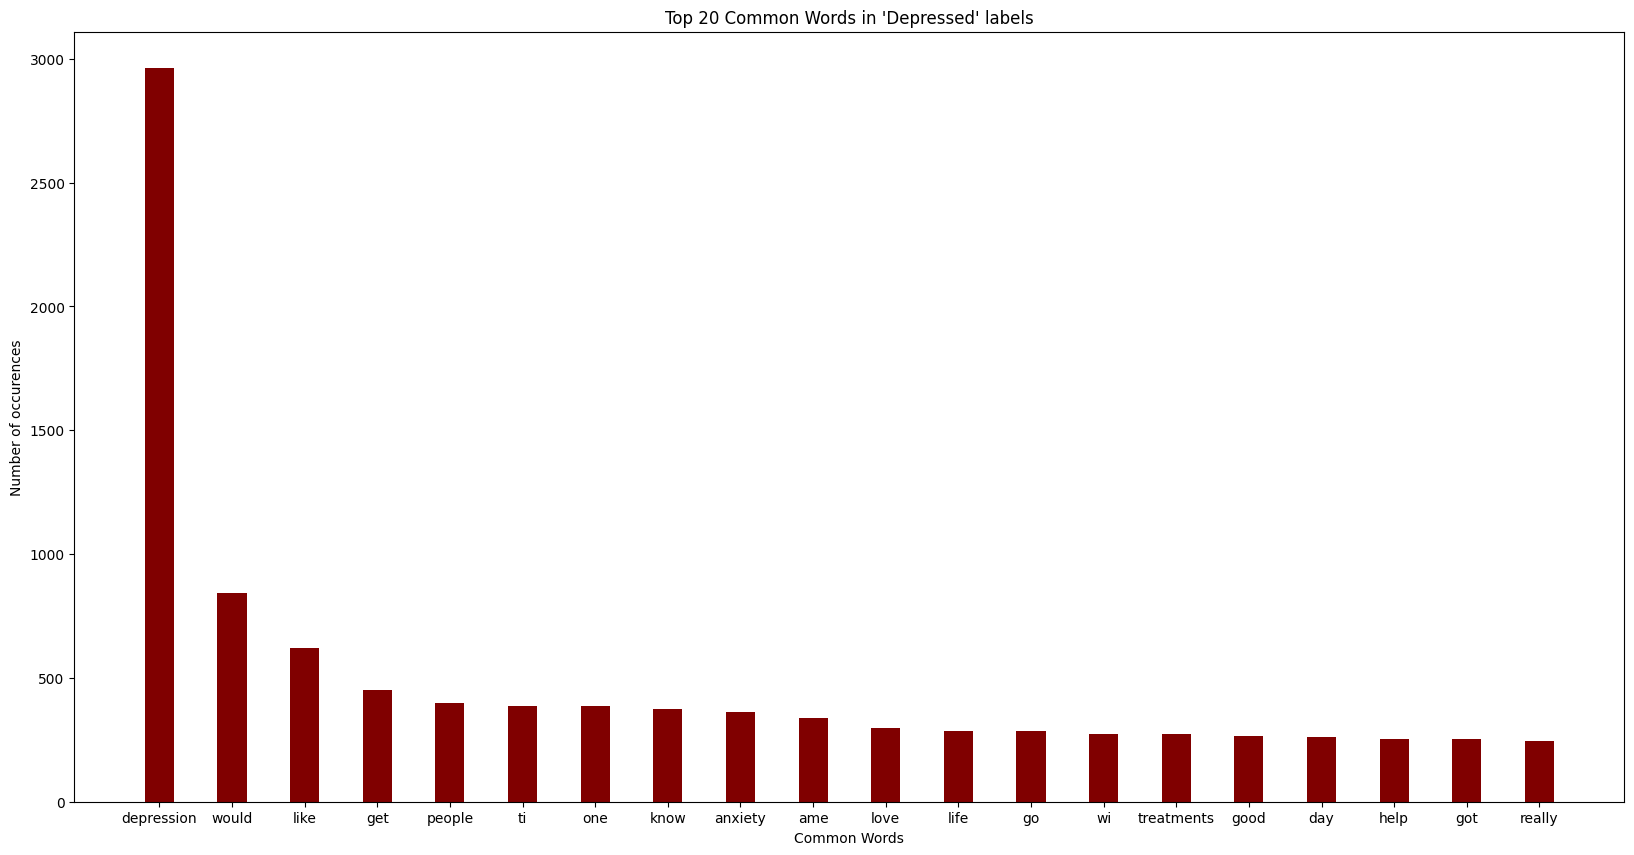

In [132]:
## Visualise in Bar Graph (Popular Words in depressed label)
import matplotlib.pyplot as plt

depressed_words_df = popular_words(df_uncleaned_depressed['Message'])
# depressed_words_df = temp_df.groupby('Common_words').sum().sort_values(by='count',ascending=False)

depressed_words_df
# courses = list(depressed_words_df.keys())
# values = list(depressed_words_df.values())

common_words_list = []
count_list = []

for index, row in depressed_words_df.iterrows():
    common_words_list.append(row['Common_words'])
    count_list.append(row['count'])
    

fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(common_words_list, count_list, color ='maroon',
        width = 0.4)
 
plt.xlabel("Common Words")
plt.ylabel("Number of occurences")
plt.title("Top 20 Common Words in 'Depressed' labels")
plt.show()


**Insights**: After taking a deeper look at only depressed labelled tweets, we are able to notice extra words such as "treatments" and "help" to name a few. We are able to also observe that there are many words that are common in the whole dataset also appear for the most common words of depressed labelled tweets. However, some of these words may also appear in non depressed label tweets. Therefore, further filtering can be done to find out the most common words that strictly only appear for depressed labelled tweets to ensure only words representative of the label is extracted.

> Getting the most popular words for the whole dataset for non-depressed labelled tweets

In [133]:
# Find Common Words in non-depressed labels (To see if they are overlaps)
df_uncleaned_nondepressed =df_uncleaned[df_uncleaned["Label"] == 0] 
df_uncleaned_nondepressed.shape

(16114, 3)

In [134]:
from collections import Counter

# function for checking popular words in non-depressed labels:
def popular_words(series):
#     data1['temp_list'] = series.apply(lambda x:str(x).split())
    top = Counter([item for sublist in df_uncleaned_nondepressed['Tokenised'] for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','count']
    return temp

popular_words(df_uncleaned_nondepressed['Message'])

Common_words  count
0         would   1297
1          good    778
2          like    734
3           ame    658
4          love    656
5            ti    608
6            wi    582
7           day    559
8           one    546
9          know    528
10          get    526
11       thanks    495
12        thank    463
13            u    454
14          lol    444
15           go    439
16      twitter    435
17          see    416
18          got    407
19          new    380

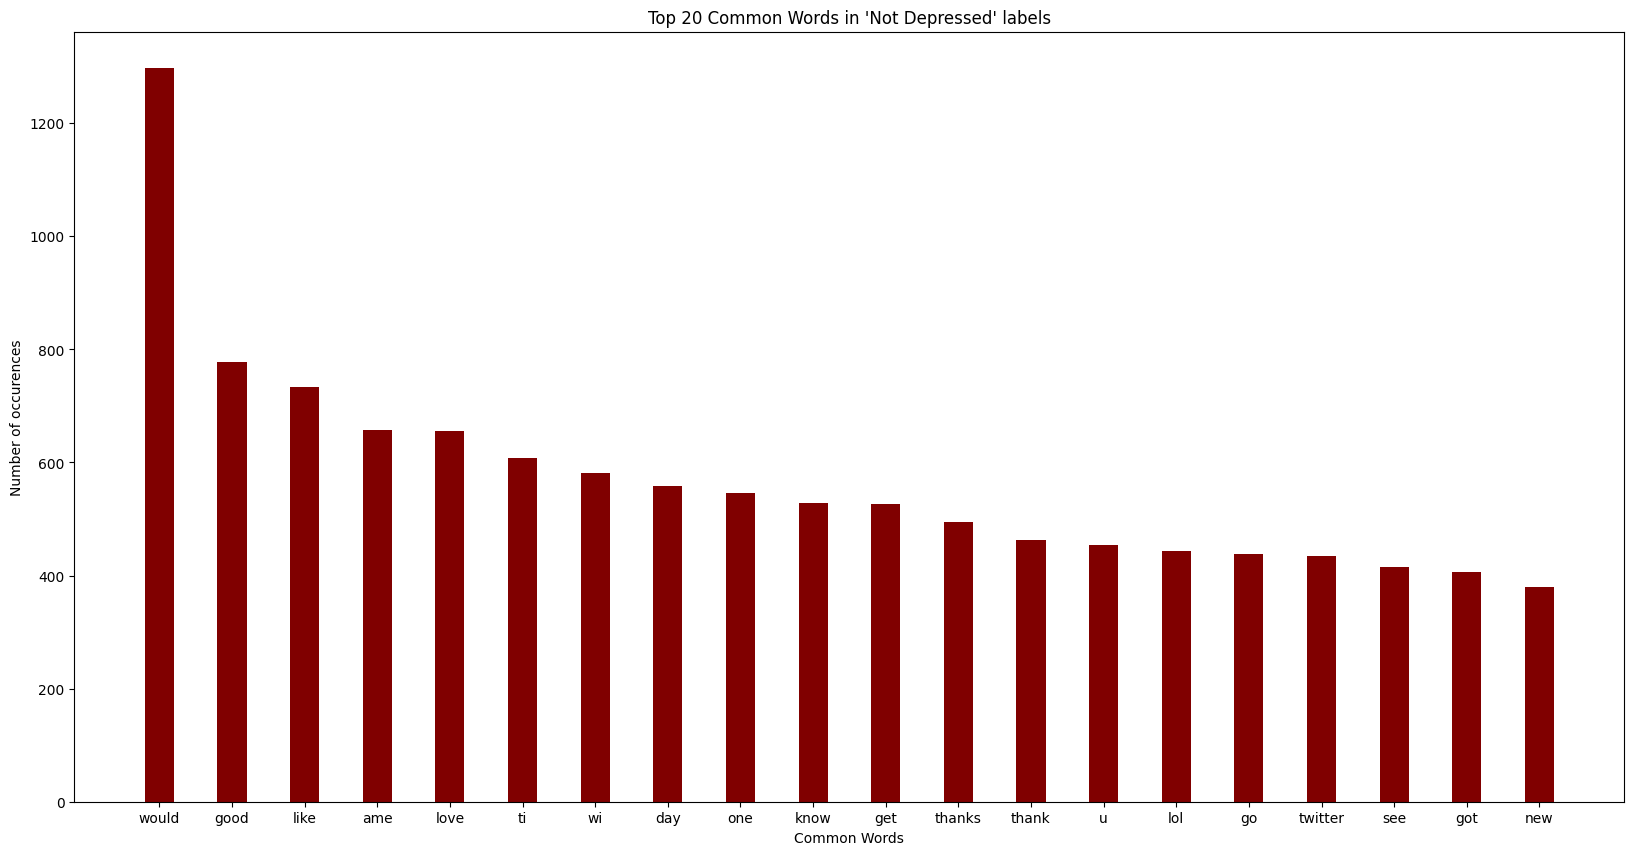

In [135]:
## seems like there's omething werong with this graph - braint not functiomning well now 
## UPDATE: all okie noww
## Visualise in Bar Graph (Popular Words in NON depressed label)
import matplotlib.pyplot as plt

nondepressed_words_df = popular_words(df_uncleaned_nondepressed['Message'])

nondepressed_words_df

common_words_list = []
count_list = []

for index, row in nondepressed_words_df.iterrows():
    common_words_list.append(row['Common_words'])
    count_list.append(row['count'])
    

fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(common_words_list, count_list, color ='maroon',
        width = 0.4)
 
plt.xlabel("Common Words")
plt.ylabel("Number of occurences")
plt.title("Top 20 Common Words in 'Not Depressed' labels")
plt.show()


**Insights**: Looking at the common words in the non depressed label tweets, we are able to see words like "would" and "like" which appears in both depressed and non depressed label tweets. We need to filter any other words that may exist in both labels to ensure that we can extract the unique common words of the depressed label tweets.

> Getting the most common unique words for depressed labelled tweets (top words that only appears in depressed labelled tweets)

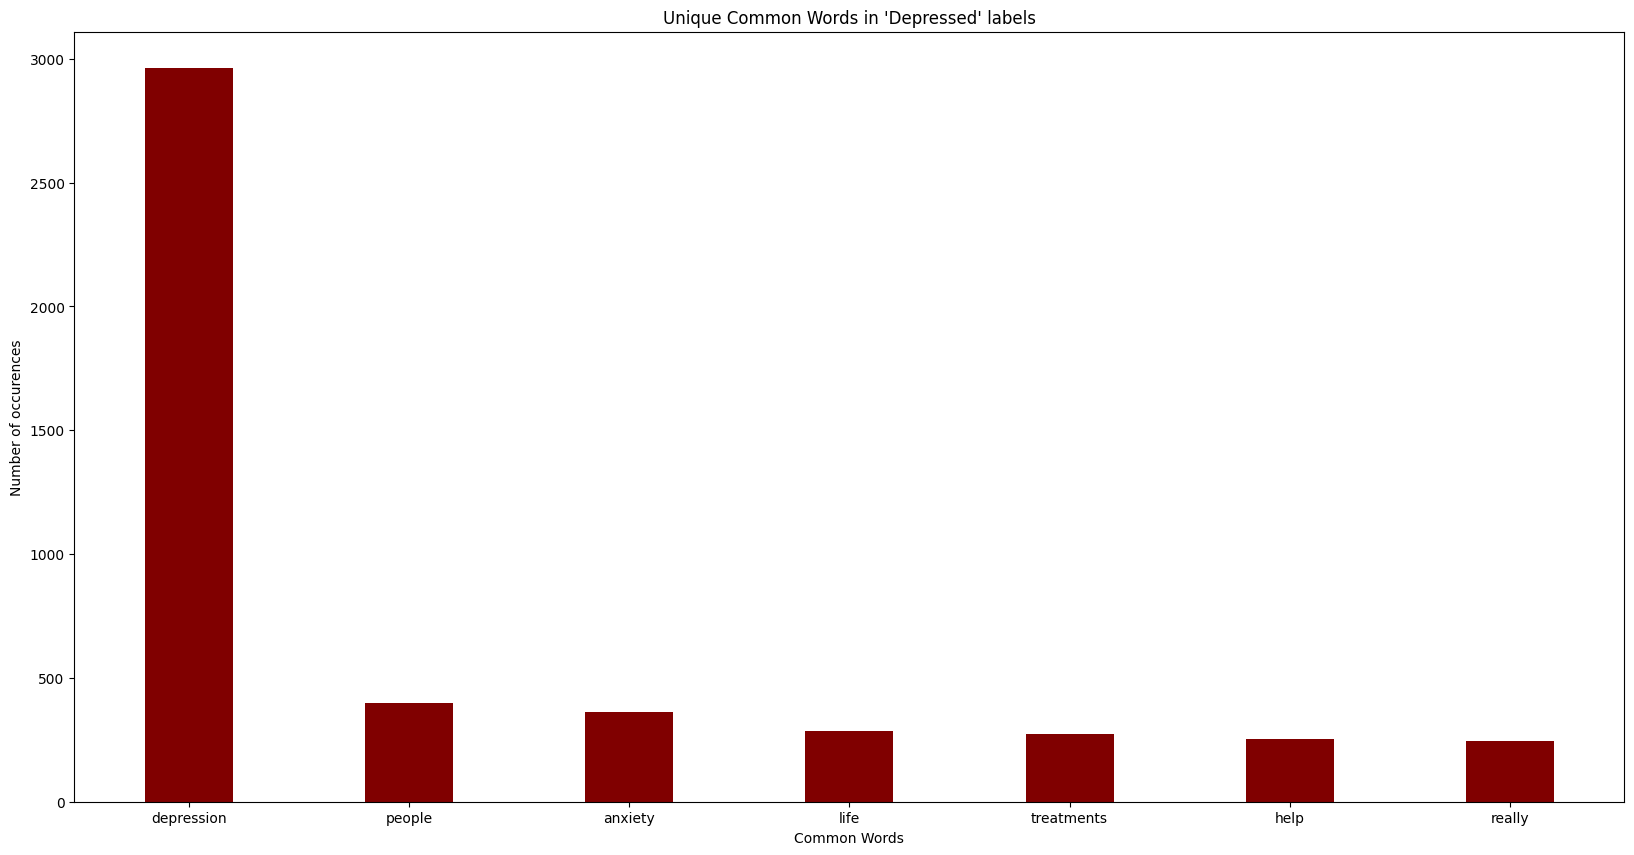

In [136]:
#Find common words in depressed labels that do not appear in non depressed labels

# Depressed dataframe
depressed_words_df

depressed_words = []
depressed_count = []

for index, row in depressed_words_df.iterrows():
    depressed_words.append(row['Common_words'])
    depressed_count.append(row['count'])

# Non Depressed dataframe
nondepressed_words_df

nondepressed_words = []
nondepressed_count = []

for index, row in nondepressed_words_df.iterrows():
    nondepressed_words.append(row['Common_words'])
    nondepressed_count.append(row['count'])


unique_depressed_words = []
unique_depressed_count = []

for i in range(len(depressed_words)):
    if depressed_words[i] not in nondepressed_words:
        unique_depressed_words.append(depressed_words[i])
        unique_depressed_count.append(depressed_count[i])

        
# Plot Bar Graph
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(unique_depressed_words, unique_depressed_count, color ='maroon',
        width = 0.4)
 
plt.xlabel("Common Words")
plt.ylabel("Number of occurences")
plt.title("Unique Common Words in 'Depressed' labels")
plt.show()

**Insights**: After obtaining the unique words for the depressed label tweets, we are able to identify 8 unique words that only exist in the depressed labelled tweets.

In [137]:
df_uncleaned.head()

Message  Label                                                                                                  Tokenised
0                                                       real good moment miss hi much      0                                                               [real, good, moment, missssssssss, hi, much]
1                                                                       reading manga      0                                                                                           [reading, manga]
2                                                                                          0                                                                                                         []
3  need send em accountant tomorrow oddly even refer tax support evi wouldence though      0  [need, send, em, accountant, tomorrow, oddly, even, referring, taxes, supporting, evi, wouldence, though]
4                                                   add myspace myspacecomlookthunder      0                                                                      [add, myspace, myspacecomlookthunder]

In [138]:
df_cleaned = df_uncleaned[["Message","Label"]]

In [139]:
df_cleaned.reset_index(inplace=True)

In [140]:
df_cleaned.head()

index                                                                             Message  Label
0      0                                                       real good moment miss hi much      0
1      1                                                                       reading manga      0
2      2                                                                                          0
3      3  need send em accountant tomorrow oddly even refer tax support evi wouldence though      0
4      4                                                   add myspace myspacecomlookthunder      0

In [141]:
df_cleaned.shape

(26609, 3)

In [142]:
list_of_index = df_cleaned[df_cleaned['Message'] == ''].index.values.tolist()
print(list_of_index)
print(f'number of row with empty string: {len(list_of_index)}')

[2, 156, 263, 526, 718, 778, 809, 1233, 1461, 1480, 2053, 2708, 2800, 2948, 3394, 3477, 3506, 3779, 3821, 3960, 4153, 4289, 4294, 4478, 4773, 4837, 5005, 5201, 5496, 5511, 5677, 6413, 6432, 6529, 6570, 7279, 7471, 7707, 9034, 9583, 9606, 9704, 9718, 10197, 10313, 10378, 10404, 10428, 10480, 10524, 10641, 10652, 10665, 10740, 10775, 10806, 11015, 11045, 11082, 11104, 11122, 11126, 11167, 11247, 12929, 12957, 12980, 13054, 13102, 13103, 13195, 13233, 13591, 13596, 13611, 13699, 13707, 13715, 13808, 13821, 13917, 13972, 13993, 14026, 14044, 14066, 14155, 14365, 14541, 15106, 15267, 15324, 15327, 15331, 16112, 16170, 16218, 16454, 16522, 16549, 16584, 16592, 16607, 16633, 16653, 16682, 16686, 16694, 16733, 16797, 17097, 17322, 17383, 17725, 18411, 18474, 18599, 19114, 19116, 19319, 19324, 19558, 19567, 19722, 19829, 21730, 21868, 21925, 22011, 22391, 22530, 22566, 22639, 22774, 22947, 23161, 23305, 23412, 23489, 23518, 23609, 23610, 23677, 24068, 24123, 24365, 24625]
number of row with emp

In [143]:
df_cleaned.iloc[list_of_index]

index Message  Label
2          2              0
156      156              0
263      263              0
526      526              0
718      718              0
778      778              0
809      809              0
1233    1233              0
1461    1461              0
1480    1480              0
2053    2053              0
2708    2708              0
2800    2800              0
2948    2948              0
3394    3394              0
3477    3477              0
3506    3506              0
3779    3779              0
3821    3821              0
3960    3960              0
4153    4153              0
4289    4289              0
4294    4294              0
4478    4478              0
4773    4773              0
4837    4837              0
5005    5005              0
5201    5201              0
5496    5496              0
5511    5511              0
5677    5677              0
6413    6413              0
6432    6432              0
6529    6529              0
6570    6570              0
7279    7279              0
7471    7471              0
7707    7707              0
9034    9034              1
9583    9583              1
9606    9606              1
9704    9704              1
9718    9718              1
10197  10197              1
10313  10313              1
10378     81              1
10404    110              1
10428    138              1
10480    210              1
10524    261              1
10641    378              1
10652    389              1
10665    402              1
10740    477              1
10775    512              1
10806    543              1
11015    752              1
11045    782              1
11082    819              1
11104    841              1
11122    859              1
11126    863              1
11167    905              1
11247    991              1
12929   2760              1
12957   2816              1
12980   2962              1
13054   3329              1
13102   3466              1
13103   3467              1
13195   3616              1
13233   3664              1
13591   4083              1
13596   4088              1
13611   4104              1
13699   4194              1
13707   4202              1
13715   4211              1
13808   4305              1
13821   4318              1
13917   4417              1
13972   4473              1
13993   4494              1
14026   4528              1
14044   4546              1
14066   4569              1
14155   4659              1
14365   4950              1
14541   5129              1
15106   5857              1
15267   6053              1
15324   6300              1
15327   6303              1
15331   6307              1
16112   7252              1
16170   7328              1
16218   7390              1
16454   7644              1
16522   7716              1
16549   7747              1
16584   7798              1
16592   7807              1
16607   7827              1
16633   7854              1
16653   7875              1
16682   7904              1
16686   7908              1
16694   7916              1
16733   7983              1
16797   8092              1
17097   8430              1
17322   8664              1
17383   8725              1
17725   9071              1
18411   9903              1
18474   9970              1
18599  10132              0
19114  11022              0
19116  11024              0
19319  11346              0
19324  11359              0
19558  11722              0
19567  11734              0
19722  11910              0
19829  12025              0
21730  14178              0
21868  14523              0
21925  14636              0
22011  14743              0
22391  15196              0
22530  15381              0
22566  15426              0
22639  15509              0
22774  15671              0
22947  15879              0
23161  16125              0
23305  16291              0
23412  16447              0
23489  16551              0
23518  16584              0
23609  16699              0
23610  16701              0
236

##### Drop row with empty string

In [144]:
df_cleaned.drop(index=list_of_index, inplace = True)

/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_2215/826541498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(index=list_of_index, inplace = True)


In [145]:
df_cleaned.shape

(26462, 3)

### Splitting Training and Testing

In [146]:
x = df_cleaned.Message
y = df_cleaned.Label


In [147]:
x.values

array(['real good moment miss hi much', 'reading manga',
       'need send em accountant tomorrow oddly even refer tax support evi wouldence though',
       ...,
       'flow chart thoroughly oversold piece program documentation frederick brook jr mythical man month',
       'ship safe harbor never mean stay',
       'black hole god divi woulding zero'], dtype=object)

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### convert text to vectors

In [149]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

<hr>

## Baseline Model

In [150]:
#model
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score



In [151]:
baseline_models = []
baseline_models.append(('Logistic Regression', LogisticRegression(random_state=0)))
baseline_models.append(('Decision Tree Classifier',DecisionTreeClassifier(random_state=0)))
baseline_models.append(('Random Forest', RandomForestClassifier(random_state=0)))
baseline_models.append(("Gradientboost", GradientBoostingClassifier(random_state=345)))
baseline_models.append(('SVM', SVC()))
baseline_models.append(('Multinomial NB', MultinomialNB()))

In [154]:
# set table to table to populate with performance results
col = ['BASELINE_MODEL','TRAIN_ACCURACY_MEAN','TEST_ACCURACY', 'PRECISION', 'RECALL','F1 SCORE']

def runbaselinemodel(Xtrain, ytrain):
    train_acc_results = []
    test_acc_results = []
    #names = []
    
    df_results = pd.DataFrame(columns=col)
    
    i = 0
    # evaluate each model using cross-validation
    for name, model in baseline_models:
        kfold = KFold(n_splits=2)  # 10-fold cross-validation

        # cv accuracy scoring
        cv_acc_results = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring='accuracy')
        train_acc_results.append(cv_acc_results)

        #test accuracy scoring
        model.fit(Xtrain,ytrain)
                
        pred = model.predict(xv_test)
        test_accuracy = accuracy_score(y_test, pred)
        test_acc_results.append(test_accuracy)
        
        #Confusion Matrix
        cm = confusion_matrix(pred,y_test)
        tn = cm[0][0]
        fn = cm[1][0]
        fp = cm[0][1]
        tp = cm[1][1]
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        f1 = (2*precision*recall)/(precision + recall)

        #names.append(name)
        df_results.loc[i] = [name, round(cv_acc_results.mean()*100, 2), round(test_accuracy*100,2), round(precision*100,2), round(recall*100,2), round(f1*100,2)]

        i += 1
        
    return df_results

In [155]:
baseline_result = runbaselinemodel(xv_train, y_train)

In [156]:
baseline_result.sort_values(by=['TEST_ACCURACY', 'F1 SCORE'], ascending=False)

BASELINE_MODEL  TRAIN_ACCURACY_MEAN  TEST_ACCURACY  PRECISION  RECALL  F1 SCORE
5            Multinomial NB                77.76          79.59      57.32   85.65     68.68
4                       SVM                77.60          79.44      57.13   85.36     68.45
0       Logistic Regression                77.40          78.72      56.47   83.70     67.44
2             Random Forest                76.05          78.08      60.77   78.22     68.40
1  Decision Tree Classifier                71.33          74.12      65.10   67.46     66.26
3             Gradientboost                74.17          73.97      35.05   95.26     51.25

### GPT Language Model 

GPT-3 is still relatively new and expensive to use. GPT-2, on the other hand, is a well-established language model that has been extensively used in research and industry. It has a lower number of parameters compared to GPT-3, but is still capable of generating high-quality text and can be fine-tuned for a variety of NLP tasks.

In [157]:
import pandas as pd
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

In [159]:
# vectorization = TfidfVectorizer()
# xv_train = vectorization.fit_transform(x_train)
# xv_test = vectorization.transform(x_test)

# Initialize GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Tokenize Training data and encode into input IDs. 
input_ids = tokenizer.encode(text, return_tensors="pt")

# Generate text with the GPT-2 language model
output = model.generate(input_ids=input_ids, max_length=200, do_sample=True)

# Decode generated text and print
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

NameError: name 'text' is not defined

<hr>

## Deep Learning Model

In [280]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, CuDNNGRU,SimpleRNN, CuDNNLSTM, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.layers import InputSpec, Layer
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

https://coderzcolumn.com/tutorials/artificial-intelligence/keras-glove-embeddings-for-text-classification

### Load GloVe Word Embeddings in Memory

download glove - https://nlp.stanford.edu/projects/glove/

In this section, we are simply loading Glove embeddings in memory from the file. We have created a simple dictionary whose keys are tokens (words) and values are embeddings.

In [255]:
import numpy as np

glove_embeddings = {}
with open("./glove.twitter.27B/glove.twitter.27B.200d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        try:
            line = line.split()
            glove_embeddings[line[0]] = np.array(line[1:], dtype=np.float32)
        except:
            continue

In [256]:
embeddings = glove_embeddings["the"]

embeddings.shape, embeddings.dtype

((200,), dtype('float32'))

### Word Embedding

A word embedding is a learned representation for text where words that have the same meaning have a similar representation.

Word embedding methods learn a real-valued vector representation for a predefined fixed sized vocabulary from a corpus of text.

In [257]:
'''
First, we have created an instance of Tokenizer and called fit_on_texts() method on it. We have provided the method train and test examples.
A call to this method will internally populate a vocabulary of all unique tokens in the tokenizer object.

Next, we have called texts_to_sequences() method on Tokenizer object with train and test text examples. 
This method will tokenize each text example into tokens and then retrieve indexes of those tokens from the vocabulary.

Now, each of our text examples is of a different length and hence has a different number of tokens (words). 
We have decided to keep maximum of 50 tokens per text example. To do this, we have called pad_sequences() function on the list 
of token indexes. This method will make sure that each example has exactly 50 token indexes. 
The examples that have more than 50 tokens will be truncated to 50 tokens and those who
have less than 50 tokens will be padded with 0s to bring it to length 50.
'''

maxlen = 100

tokenizer = Tokenizer() 
tokenizer.fit_on_texts(df_cleaned.Message)

## Vectorizing data to keep 50 words per sample.
X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen, truncating="post", value=0.)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen, truncating="post", value=0.)


In [261]:
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
print(vocab_size)

23579


In [259]:
print(X_train[:3])

X_train.shape, X_test.shape

[[  238  3081 10847  1343  6916  1484  4564  6917   407   423 10848     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 2453  1312     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0    

((19846, 100), (6616, 100))

In this section, we have implemented the third step of our encoding process that we had explained earlier. We are simply looping through our vocabulary and retrieving GloVe embeddings for each token. We have then stacked embeddings of all tokens of our vocabulary in one big matrix. The matrix have shape (vocab_len, embed_len). The embedding length in our case is 300 as we had said earlier.

We can now retrieve glove embedding from this matrix by integer indexing it using the token index of that token. To explain it with an example, let's say that the index of 'the' token in our vocabulary is '1' then we can simply index embedding matrix like 'embedding_matrix[1]' to retrieve the embedding of the token 'the'.

In [265]:
embed_len = 200

word_embeddings = np.zeros((len(tokenizer.index_word)+1, embed_len))

for idx, word in tokenizer.index_word.items():
    word_embeddings[idx] = glove_embeddings.get(word, np.zeros(embed_len))

In [278]:
word_embeddings[1][:3]

array([0.14515001, 0.32532001, 0.31202999])

In [238]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

##### Define Network

In [273]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embed_len, 
                           input_length=maxlen, trainable=False, weights=[word_embeddings]))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 200)          4715800   
                                                                 
 flatten_2 (Flatten)         (None, 20000)             0         
                                                                 
 dense_11 (Dense)            (None, 10)                200010    
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 4,915,821
Trainable params: 200,021
Non-trainable params: 4,715,800
_________________________________________________________________


##### Train Network


In [274]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
621/621 [==============================] - 4s 3ms/step - loss: 0.5106 - accuracy: 0.7475 - val_loss: 0.4857 - val_accuracy: 0.7613
Epoch 2/20
621/621 [==============================] - 2s 3ms/step - loss: 0.4342 - accuracy: 0.7903 - val_loss: 0.4811 - val_accuracy: 0.7594
Epoch 3/20
621/621 [==============================] - 2s 3ms/step - loss: 0.3917 - accuracy: 0.8086 - val_loss: 0.4930 - val_accuracy: 0.7597
Epoch 4/20
621/621 [==============================] - 2s 3ms/step - loss: 0.3509 - accuracy: 0.8308 - val_loss: 0.5192 - val_accuracy: 0.7621
Epoch 5/20
621/621 [==============================] - 2s 3ms/step - loss: 0.3159 - accuracy: 0.8510 - val_loss: 0.5471 - val_accuracy: 0.7595
Epoch 6/20
621/621 [==============================] - 4s 6ms/step - loss: 0.2847 - accuracy: 0.8640 - val_loss: 0.5800 - val_accuracy: 0.7494
Epoch 7/20
621/621 [==============================] - 4s 6ms/step - loss: 0.2553 - accuracy: 0.8851 - val_loss: 0.6248 - val_accuracy: 0.7512
Epoch 

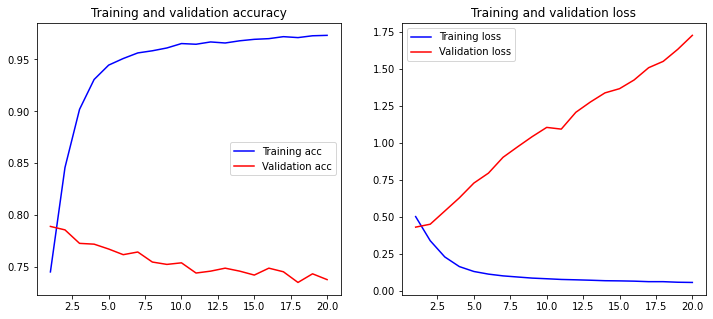

In [239]:
plot_history(history)

Global max/average pooling takes the maximum/average of all features whereas in the other case you have to define the pool size. Keras has again its own layer that you can add in the sequential model:

#### basline model using embedding layers and simpleRNN

In [287]:
# basline model using embedding layers and simpleRNN
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embed_len, 
                           input_length=maxlen, trainable=False, weights=[word_embeddings]))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 100, 200)          4715800   
                                                                 
 bidirectional_7 (Bidirectio  (None, 100, 128)         33920     
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 100, 128)         24704     
 nal)                                                            
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 32)                5152      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 1)               

In [288]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

KeyboardInterrupt: 

### Convolutional Neural Networks (CNN)

Convolutional neural networks or also called convnets are one of the most exciting developments in machine learning in recent years.

They have revolutionized image classification and computer vision by being able to extract features from images and using them in neural networks. The properties that made them useful in image processing makes them also handy for sequence processing. You can imagine a CNN as a specialized neural network that is able to detect specific patterns.

A CNN has hidden layers which are called convolutional layers. When you think of images, a computer has to deal with a two dimensional matrix of numbers and therefore you need some way to detect features in this matrix. These convolutional layers are able to detect edges, corners and other kinds of textures which makes them such a special tool. The convolutional layer consists of multiple filters which are slid across the image and are able to detect specific features.

In [244]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embed_len, 
                           input_length=maxlen, trainable=False, weights=[word_embeddings]))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1968100   
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,033,529
Trainable params: 2,033,529
Non-trainable params: 0
____________________________________________

Training Accuracy: 0.9819
Testing Accuracy:  0.7610


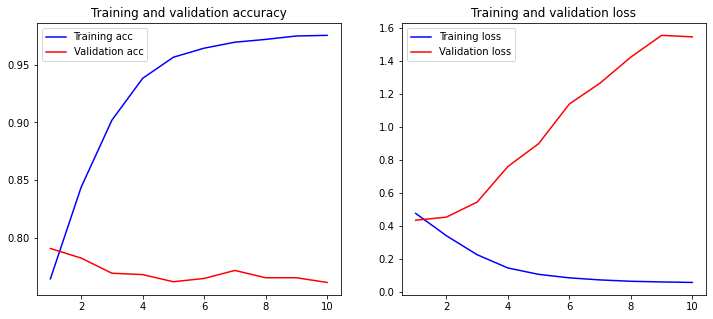

In [245]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

### Bi-Directional LSTM

In [250]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embed_len, 
                           input_length=maxlen, trainable=False, weights=[word_embeddings]))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

Training Accuracy: 0.9479
Testing Accuracy:  0.7692


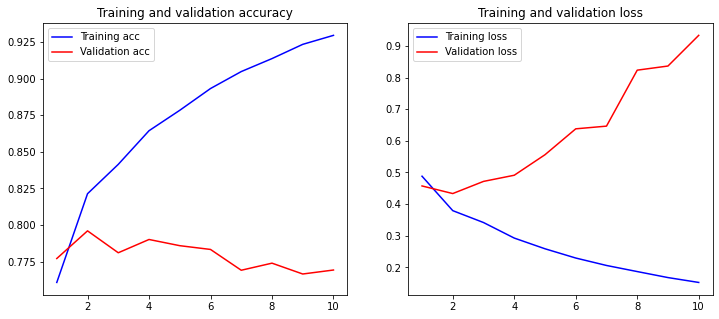

In [252]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)